In [6]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import random

# Define random order function
def random_order(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

# Define resilience computation function
def compute_resilience_adding_nodes(graph, attack_order):
    initial_nodes = graph.number_of_nodes()
    resilience = [0]  # Initialize with 0 to ensure the plot starts from 0
    added_graph = nx.Graph()
    
    for node in attack_order:
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
    return resilience

# Define community resilience computation function
def compute_community_resilience(graph, partition):
    community_resilience = {}
    for comm_id in set(partition.values()):
        subgraph_nodes = [node for node in partition if partition[node] == comm_id]
        subgraph = graph.subgraph(subgraph_nodes).copy()
        attack_order = random_order(subgraph)
        resilience = compute_resilience_adding_nodes(subgraph, attack_order)
        community_resilience[comm_id] = resilience
    return community_resilience


In [7]:
# Load the preprocessed LastFM graph
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')

# Detect communities using the Louvain method
partition_lastfm = community_louvain.best_partition(lastfm_graph)
print(f"Number of communities detected: {len(set(partition_lastfm.values()))}")

# Calculate modularity
modularity_lastfm = community_louvain.modularity(partition_lastfm, lastfm_graph)
print(f"LastFM dataset modularity: {modularity_lastfm}")

# Generate synthetic models
degree_sequence = [d for n, d in lastfm_graph.degree()]
configuration_model_lastfm = nx.configuration_model(degree_sequence)
ba_model_lastfm = nx.barabasi_albert_graph(lastfm_graph.number_of_nodes(), int(sum(degree_sequence) / lastfm_graph.number_of_nodes()))

# Convert configuration model to a simple graph
configuration_model_lastfm = nx.Graph(configuration_model_lastfm)

# Detect communities in synthetic models
partition_configuration_model_lastfm = community_louvain.best_partition(configuration_model_lastfm)
partition_ba_lastfm = community_louvain.best_partition(ba_model_lastfm)


Number of communities detected: 31
LastFM dataset modularity: 0.8145377941986631


In [8]:
# Compute community resilience for original and synthetic models
community_resilience_lastfm = compute_community_resilience(lastfm_graph, partition_lastfm)
community_resilience_configuration_lastfm = compute_community_resilience(configuration_model_lastfm, partition_configuration_model_lastfm)
community_resilience_ba_lastfm = compute_community_resilience(ba_model_lastfm, partition_ba_lastfm)


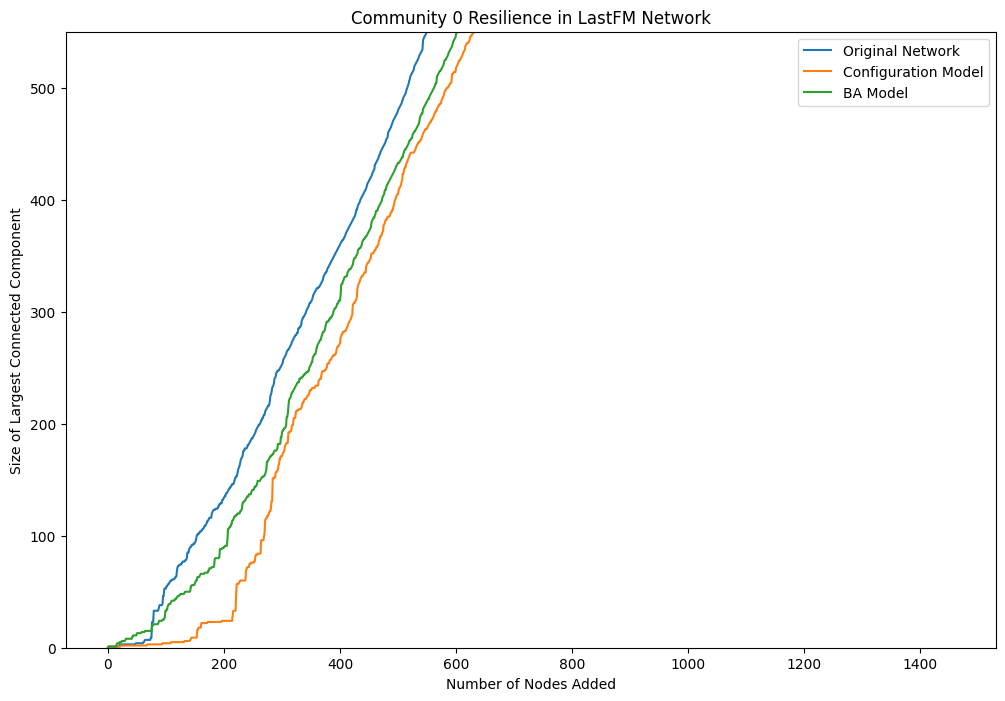

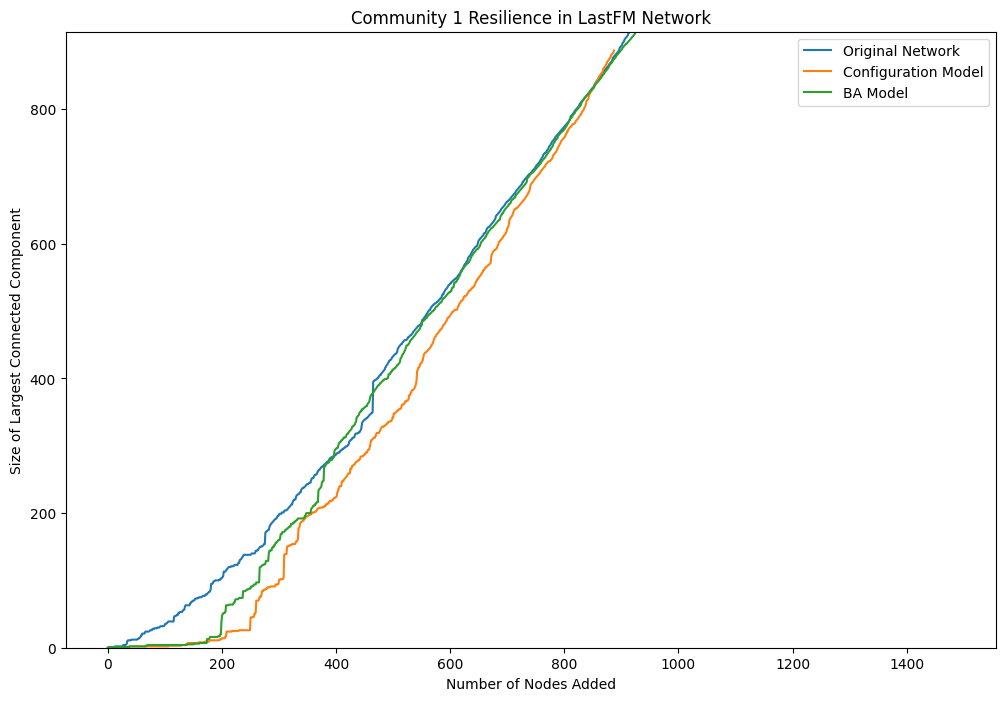

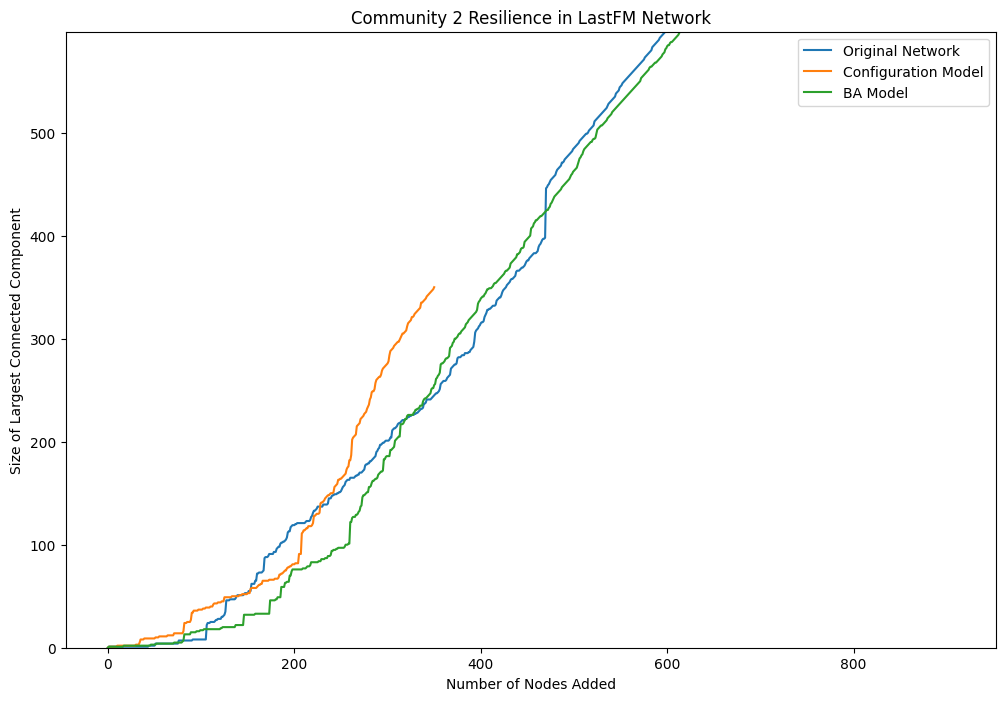

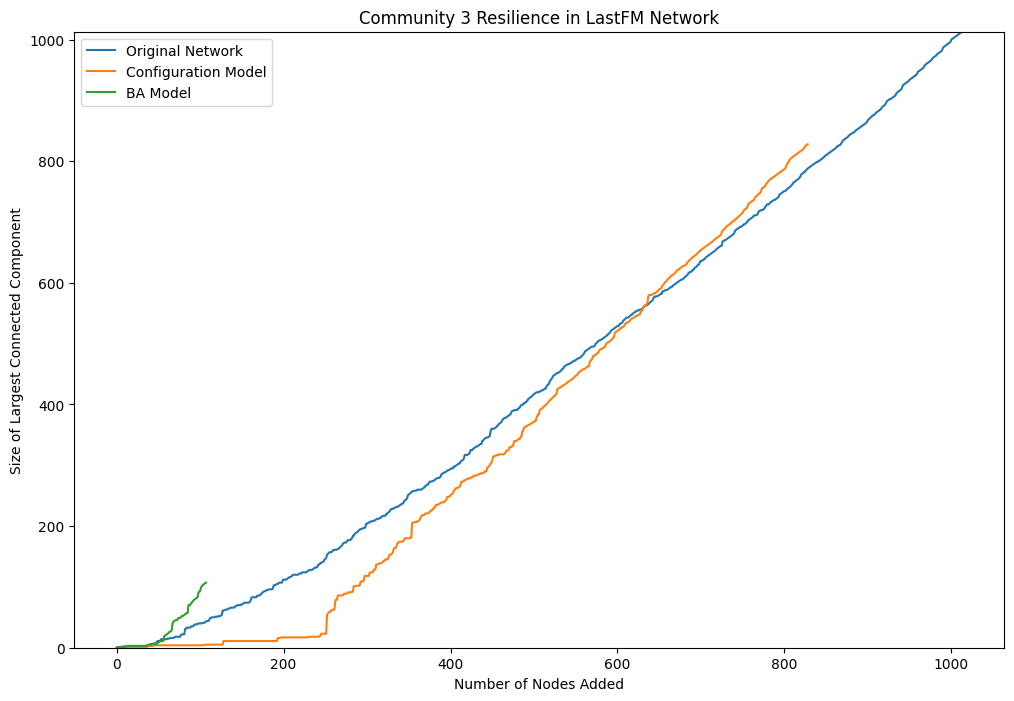

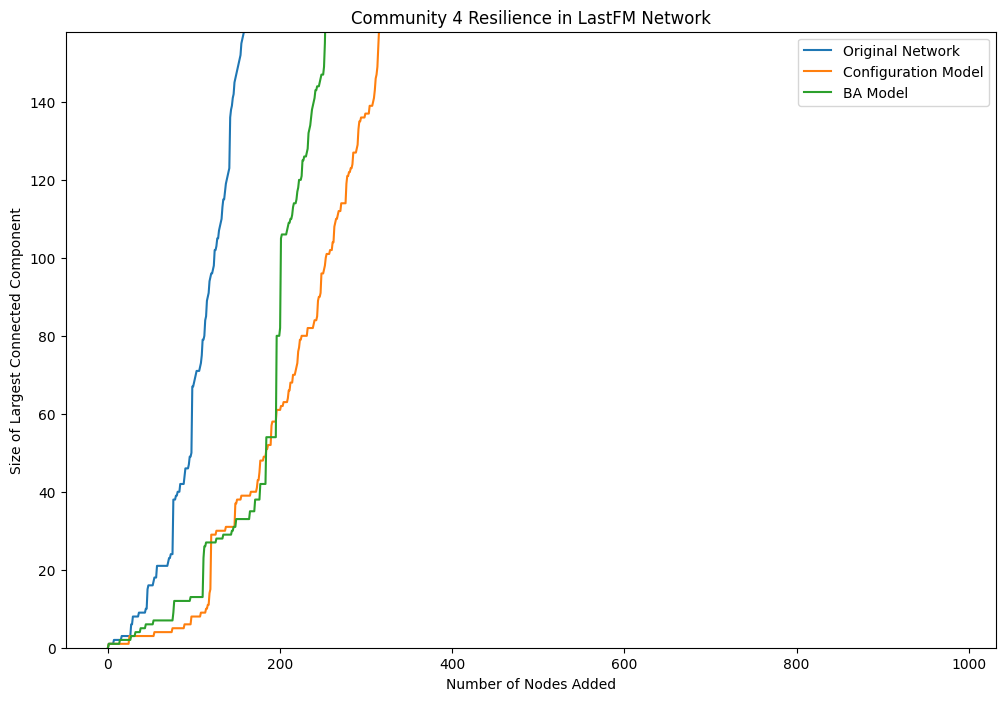

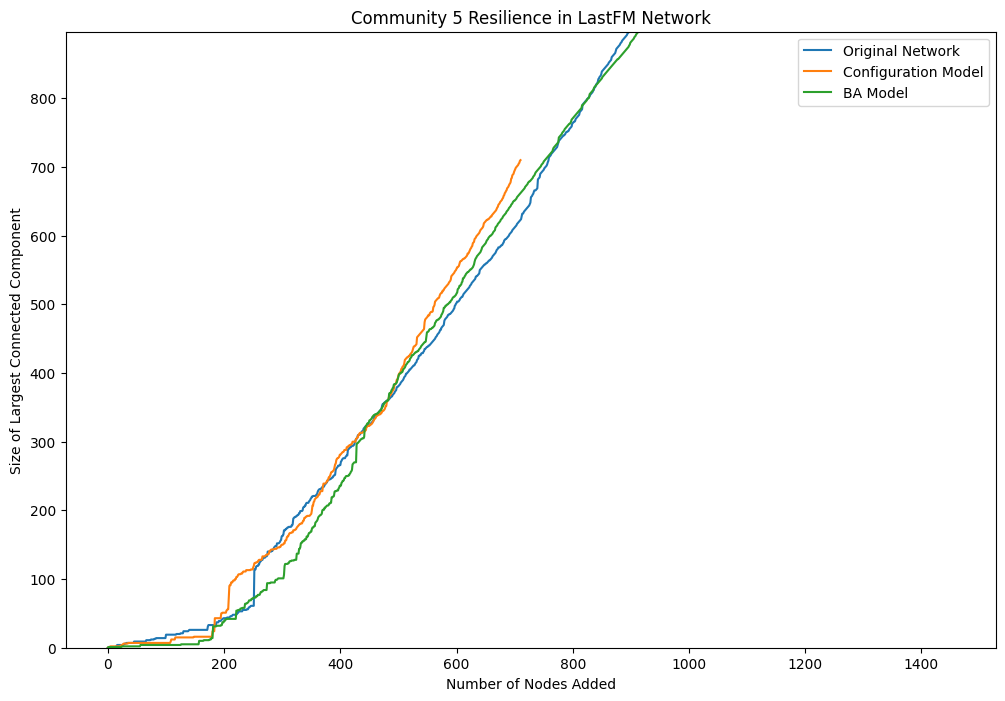

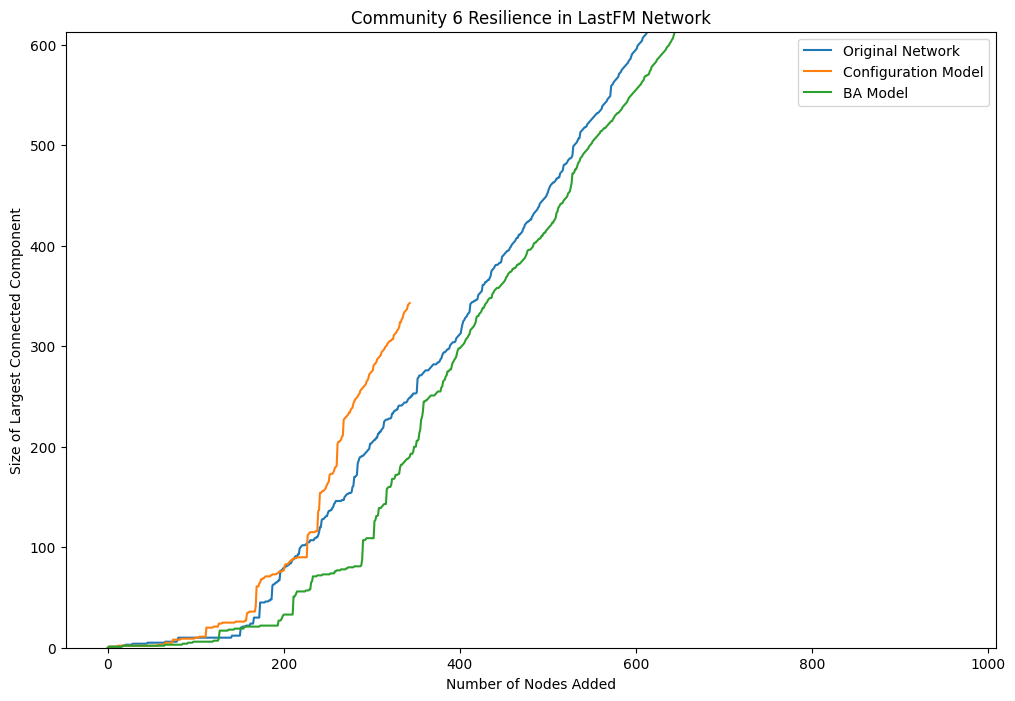

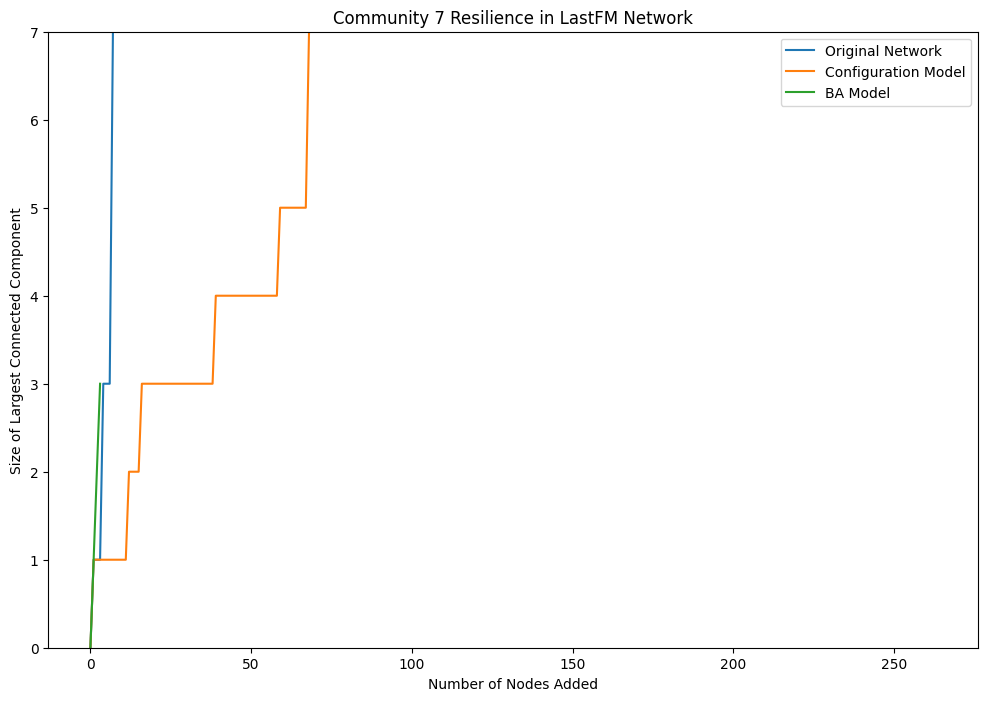

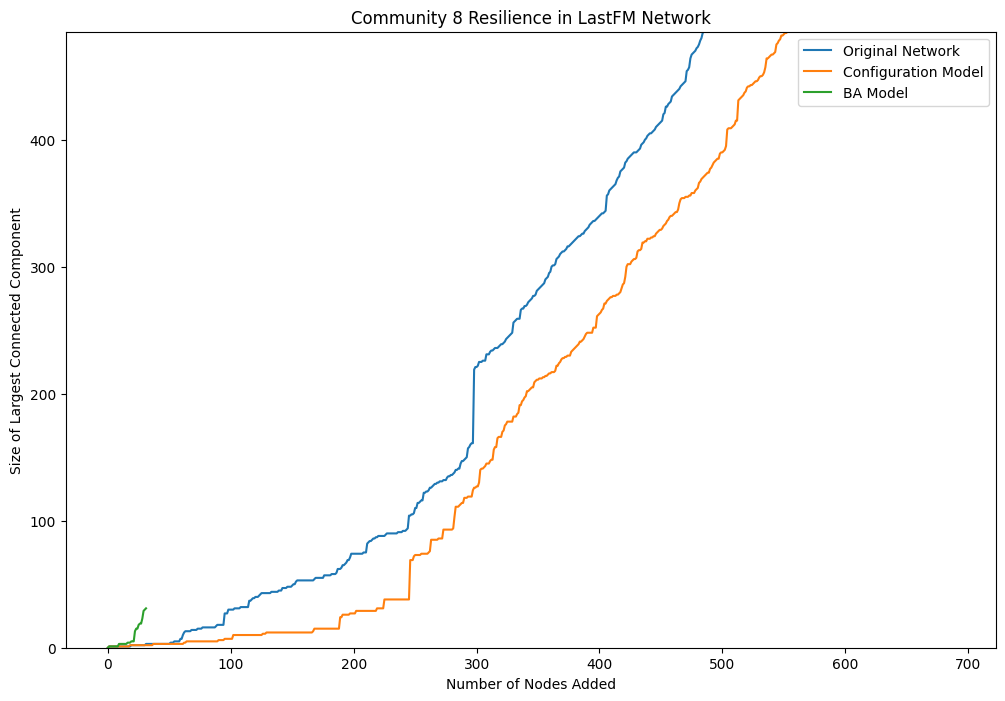

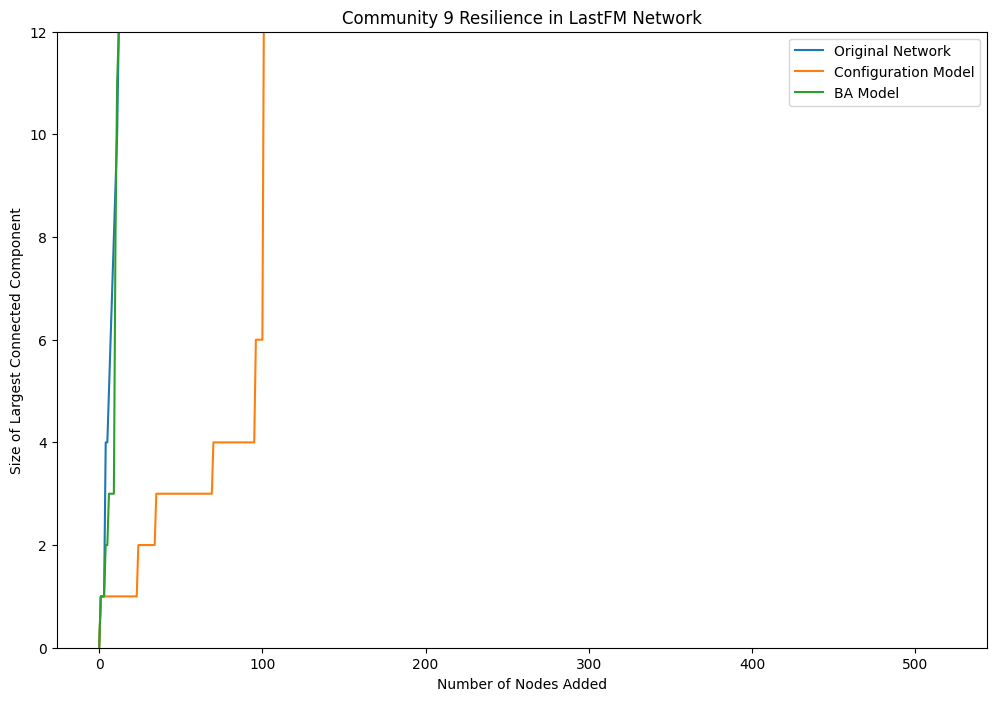

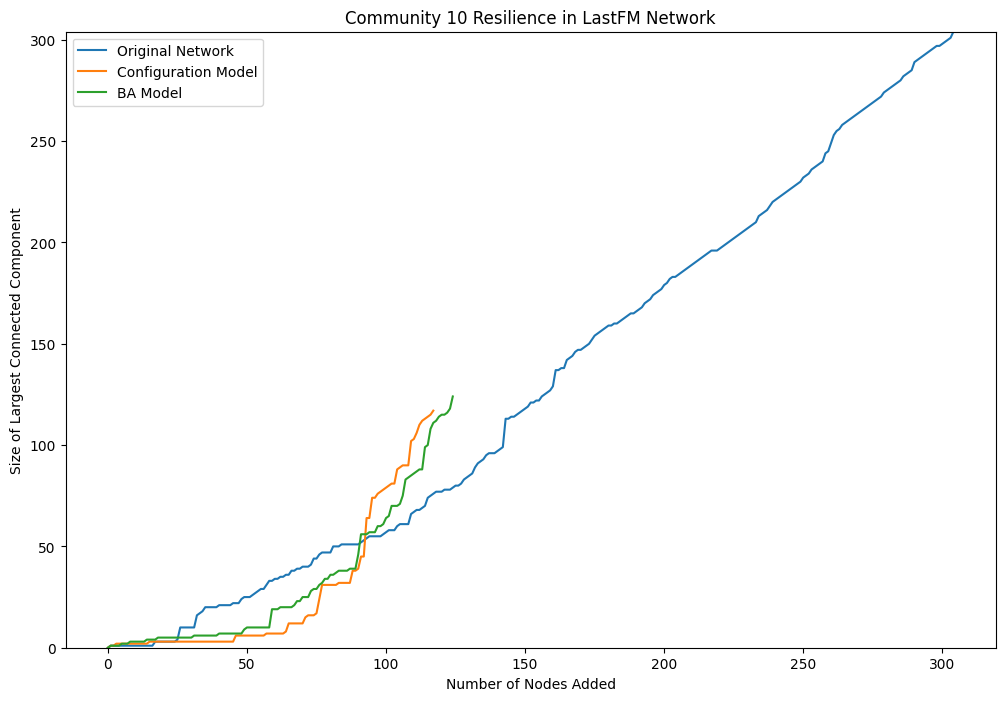

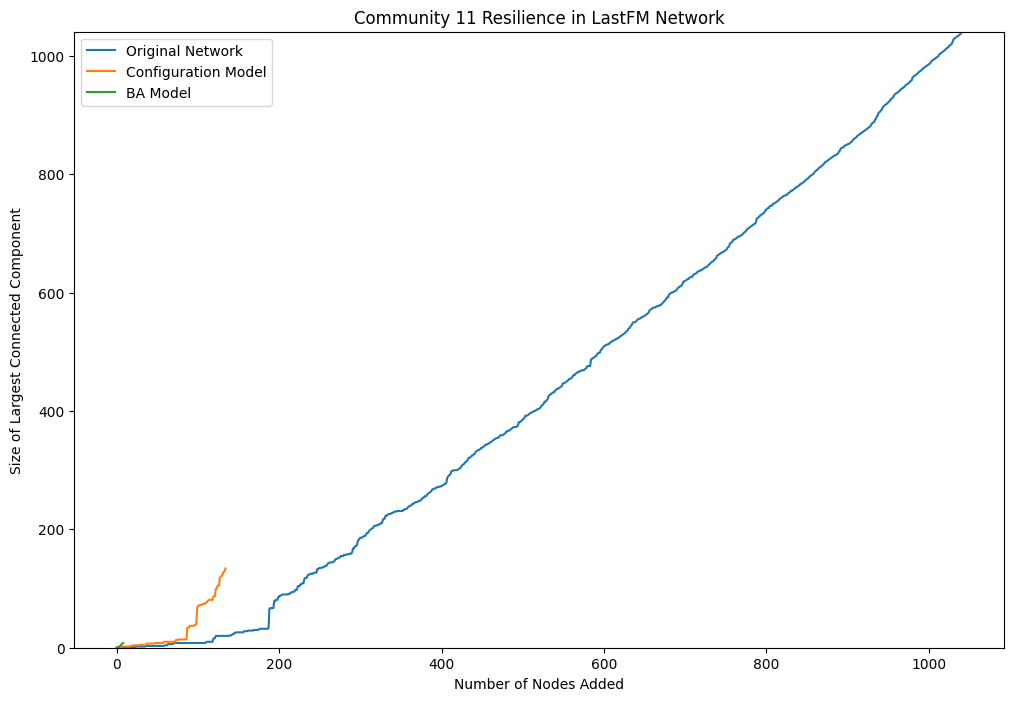

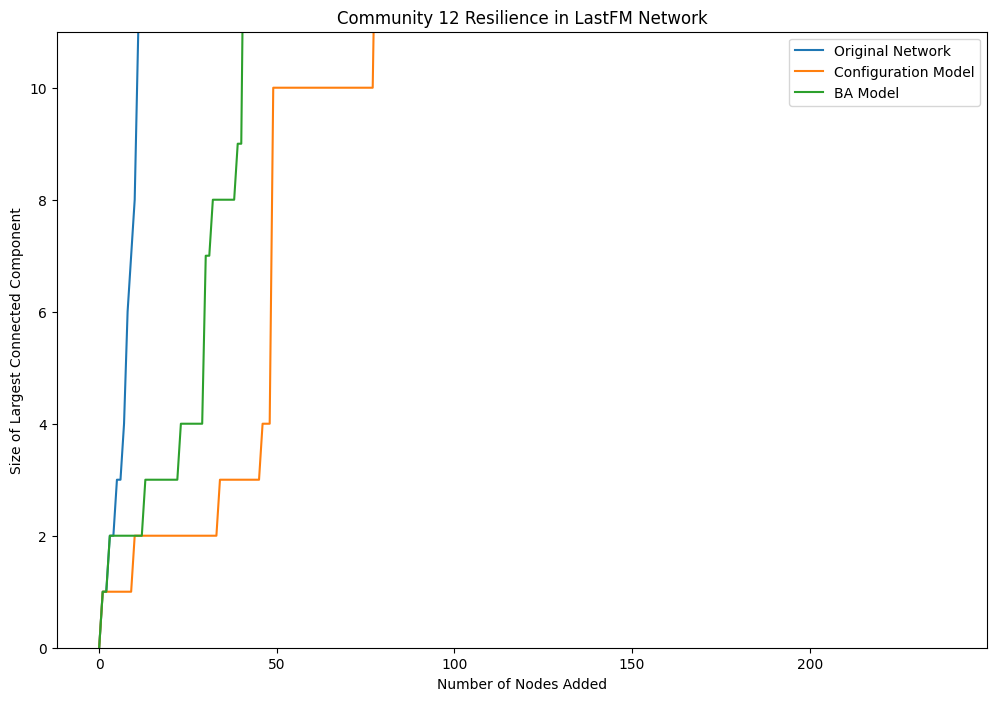

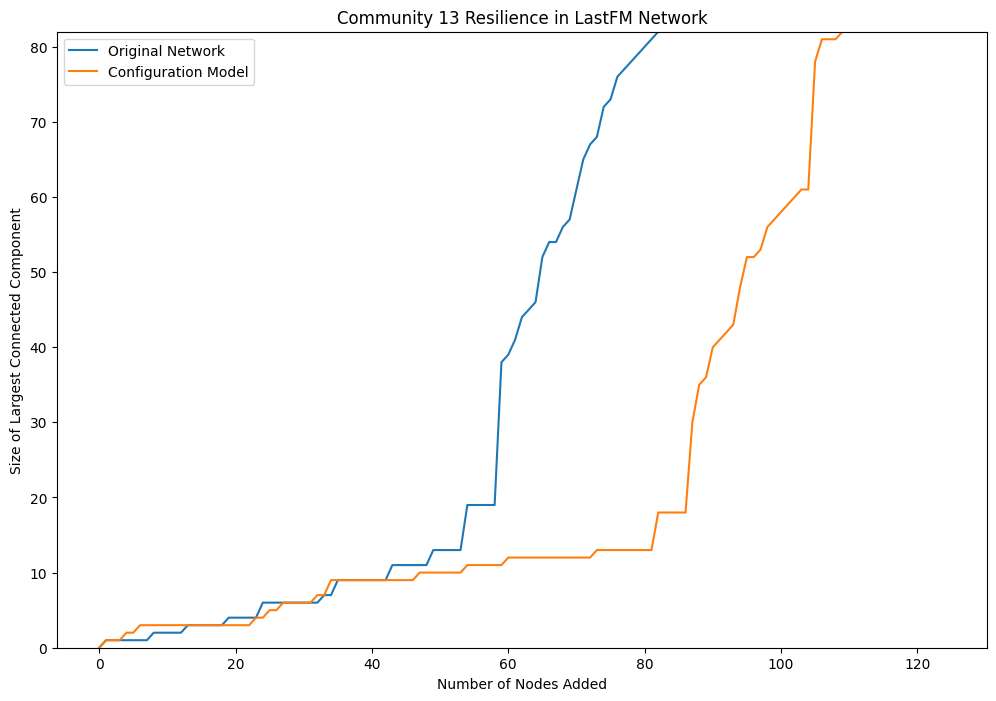

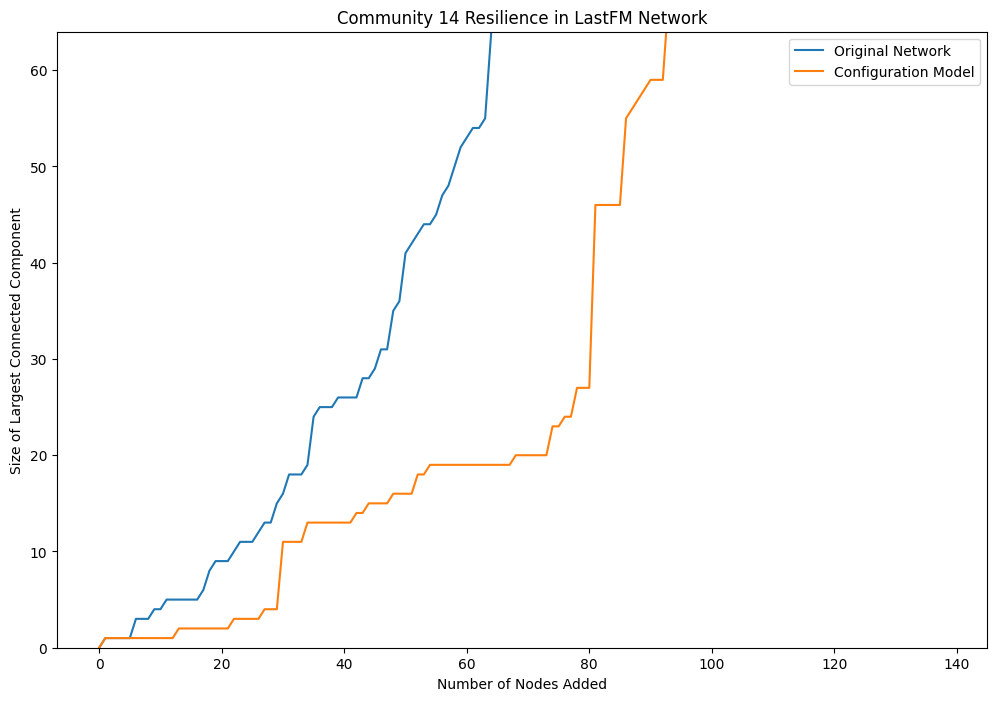

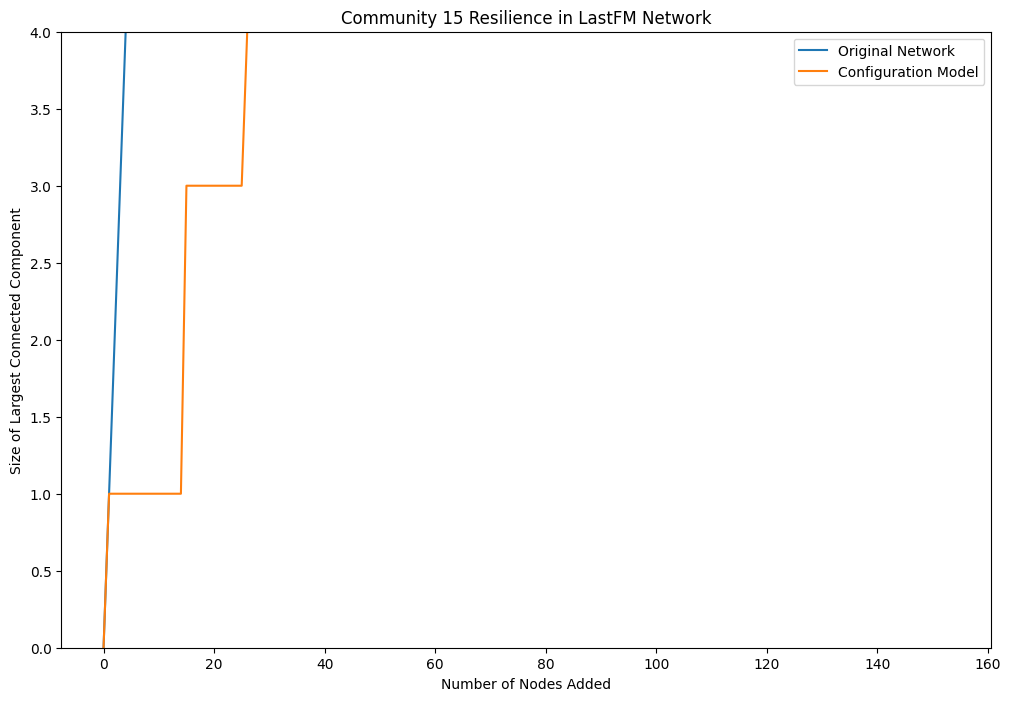

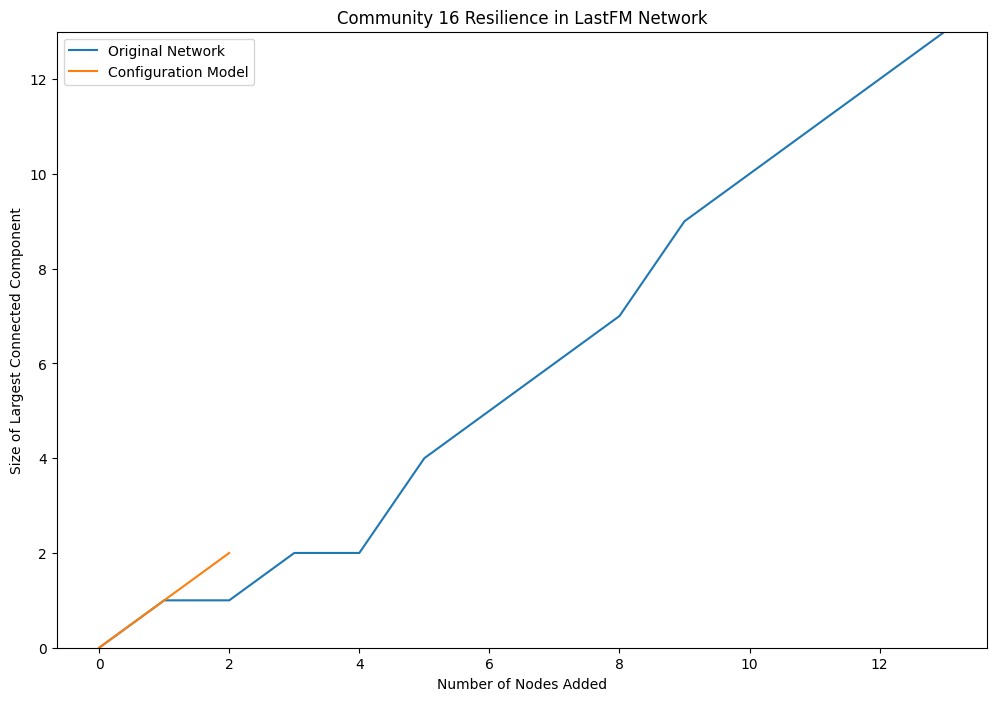

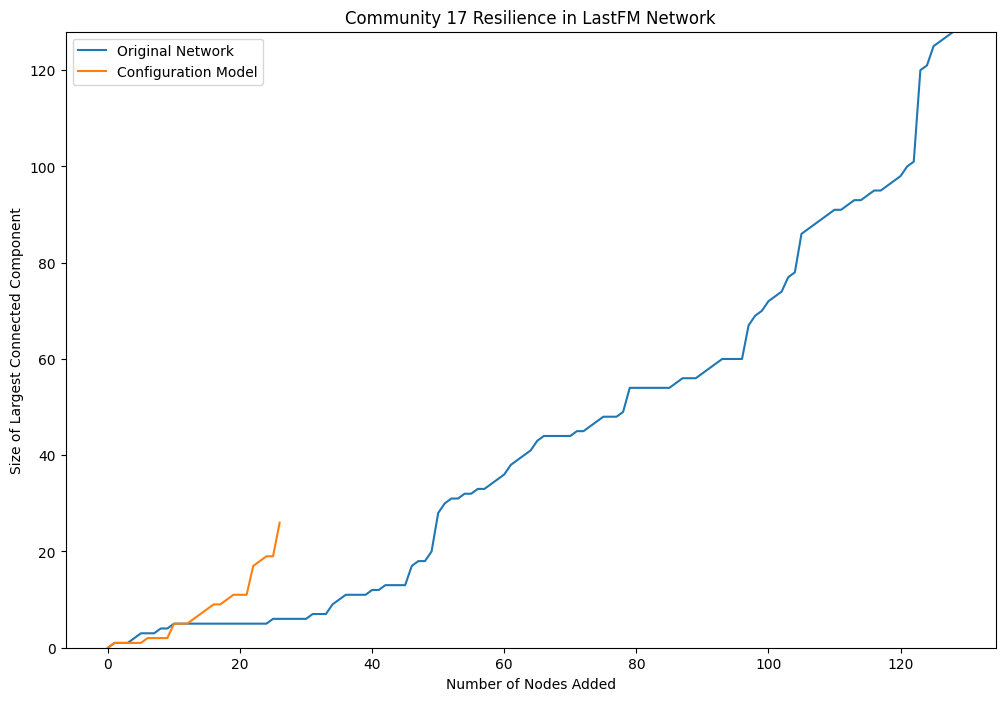

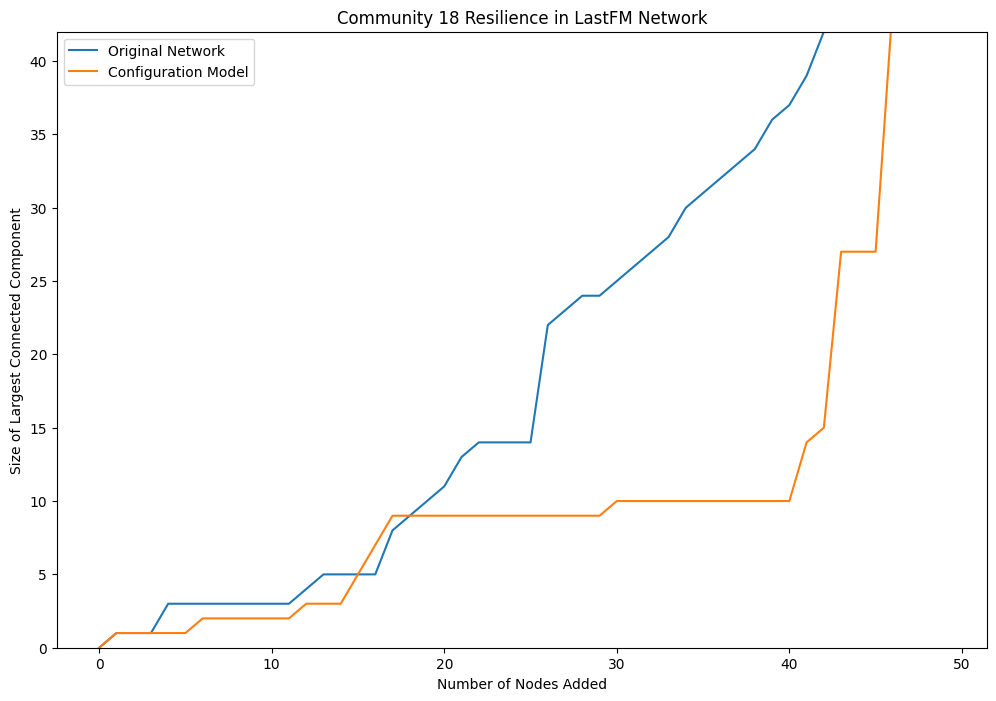

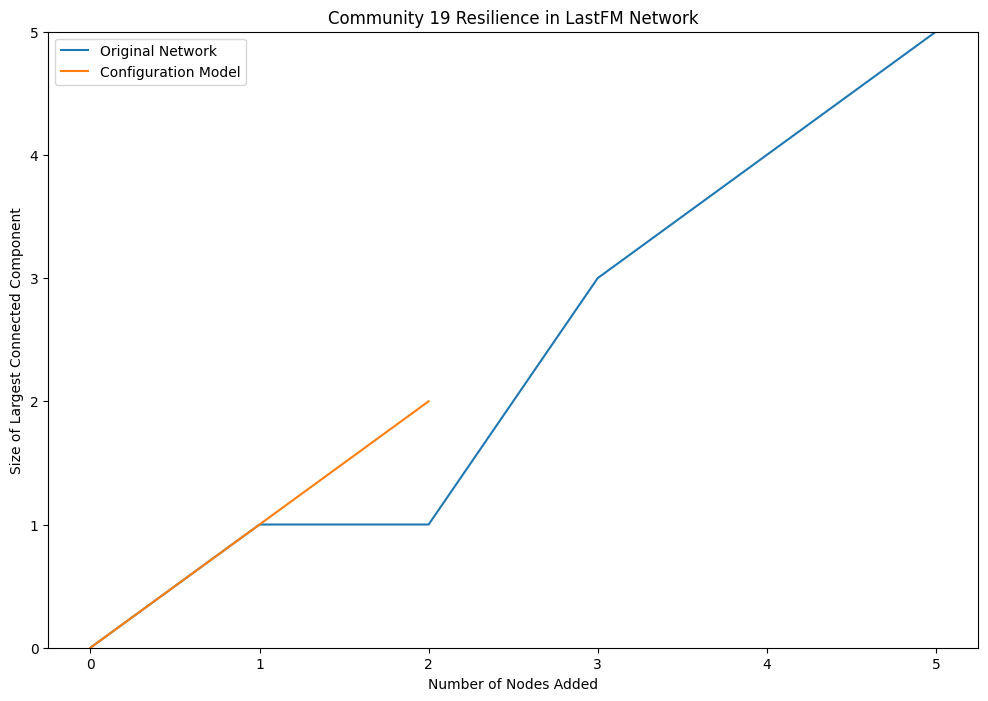

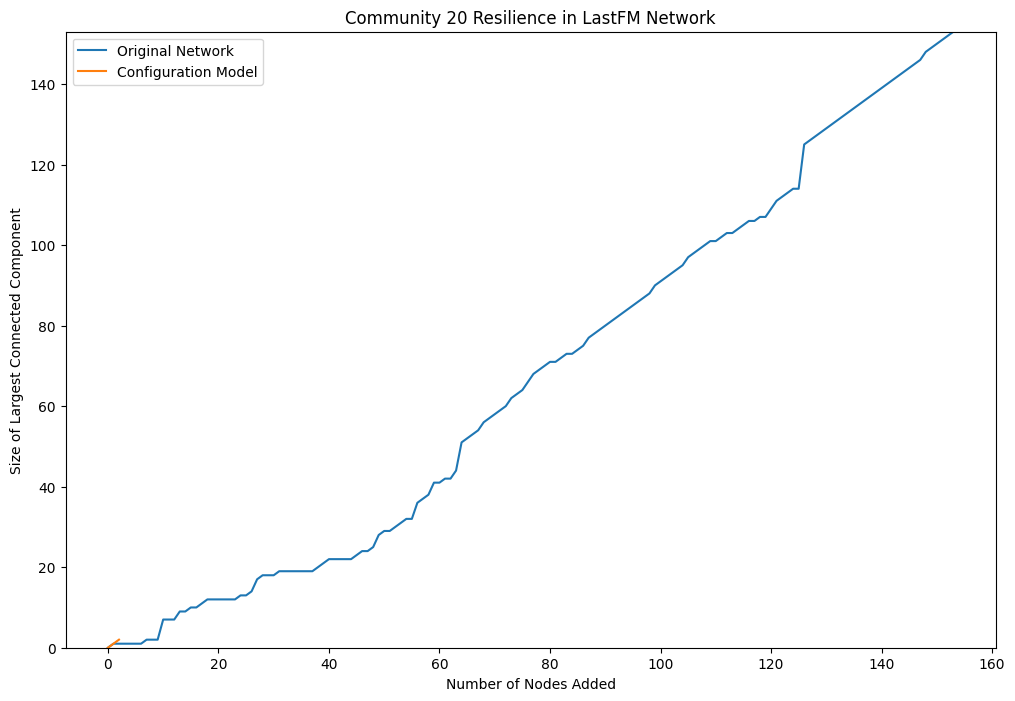

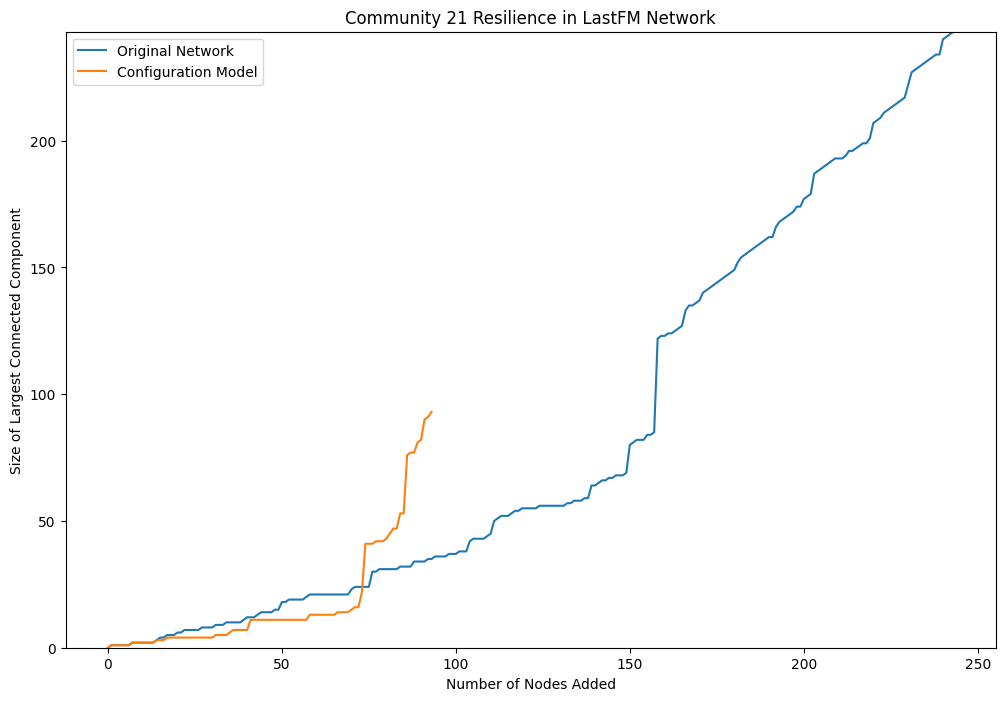

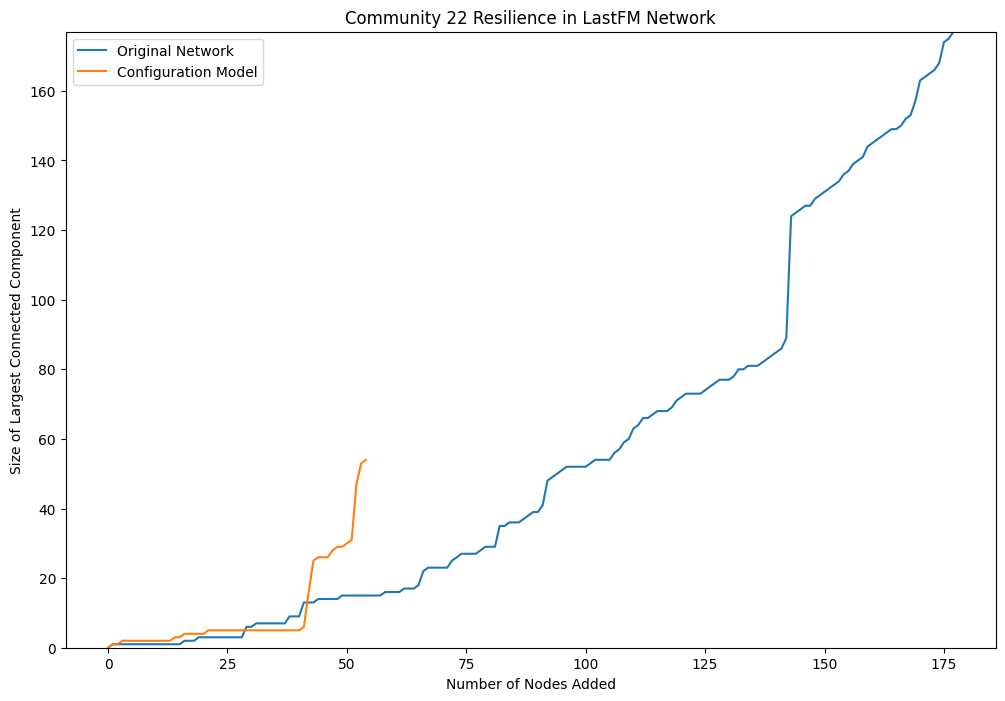

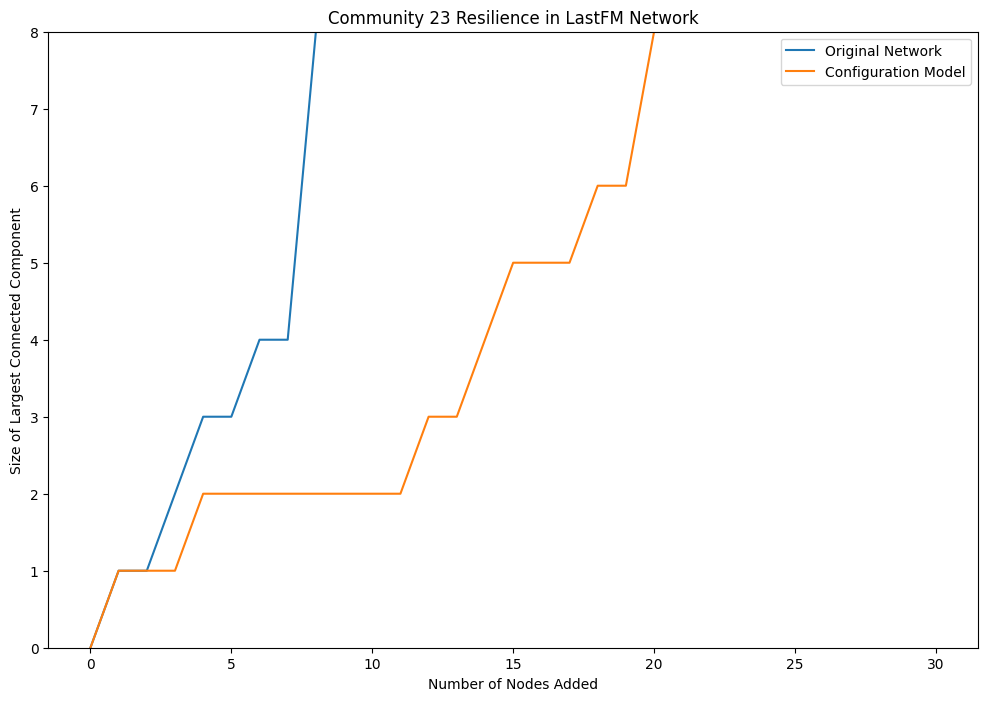

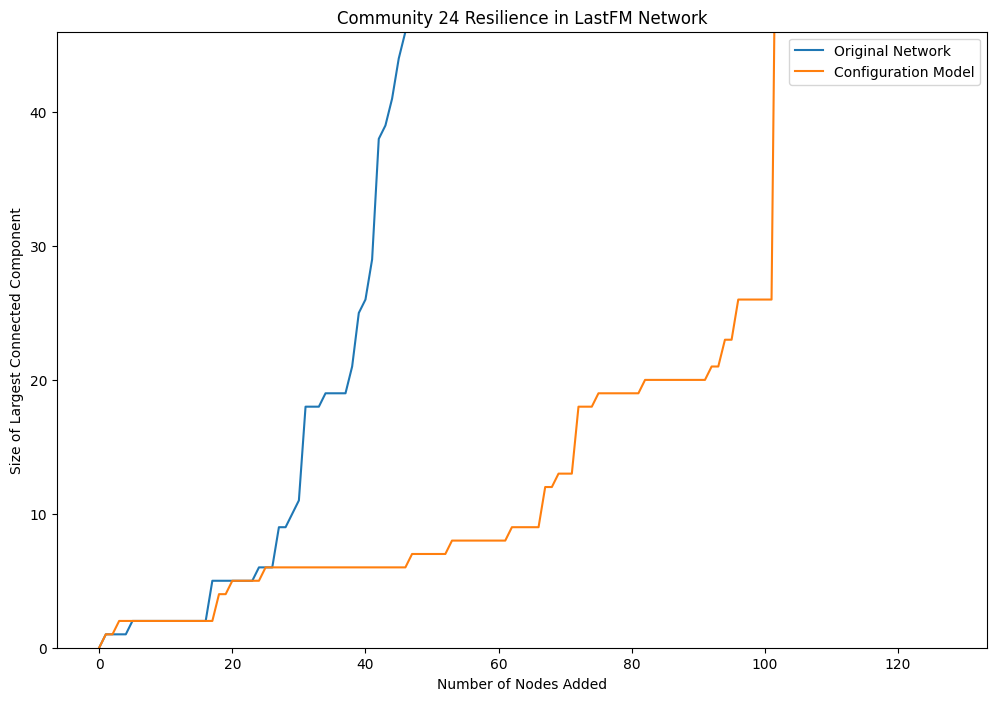

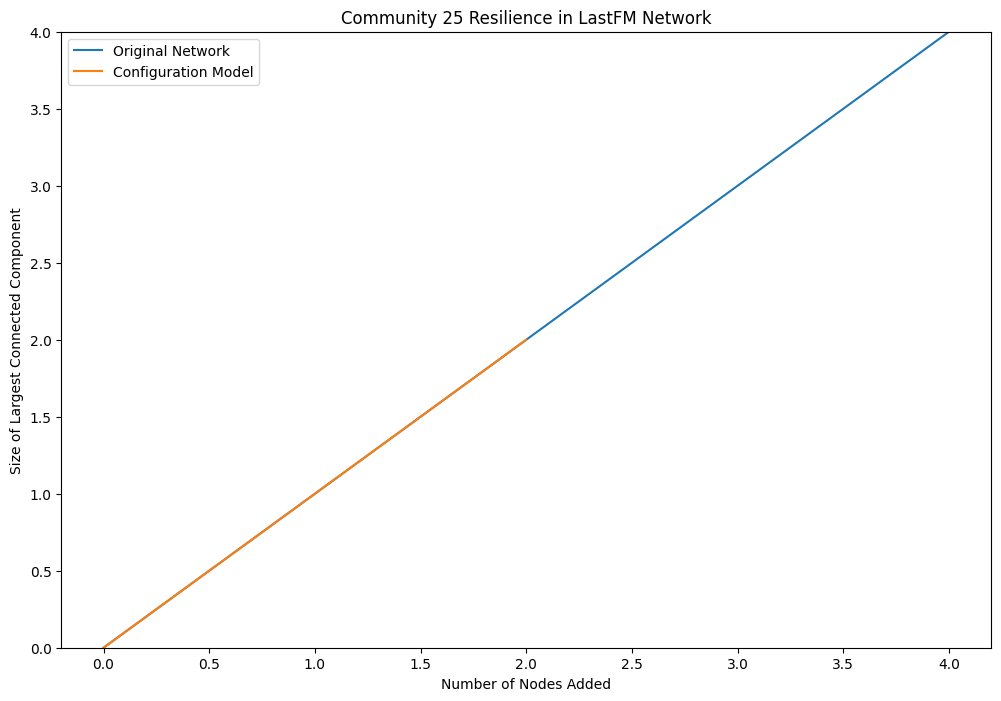

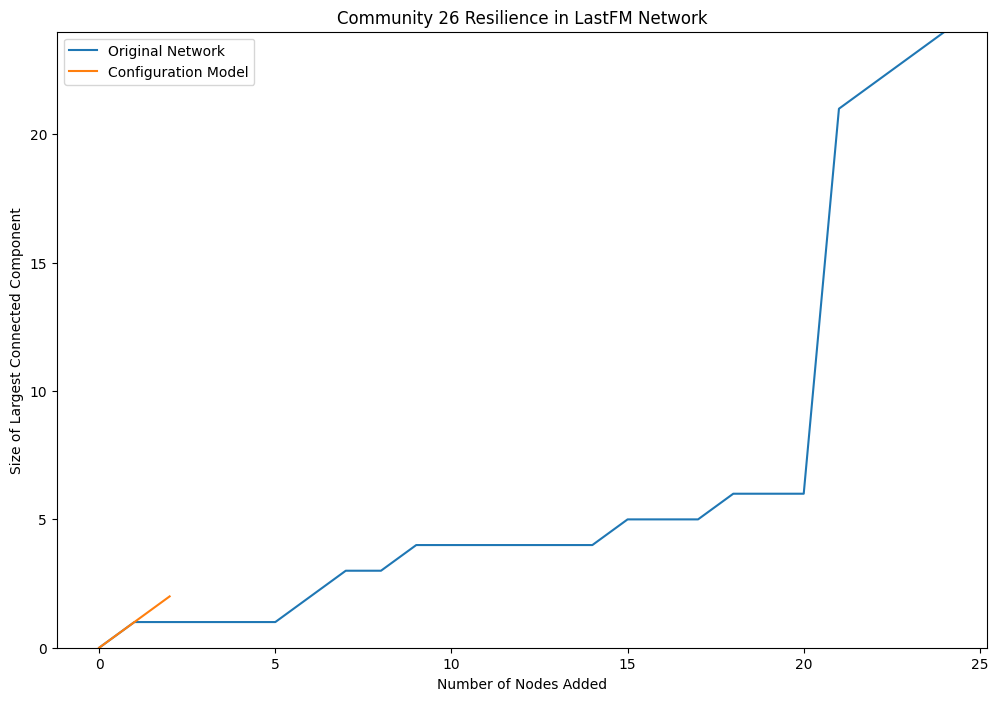

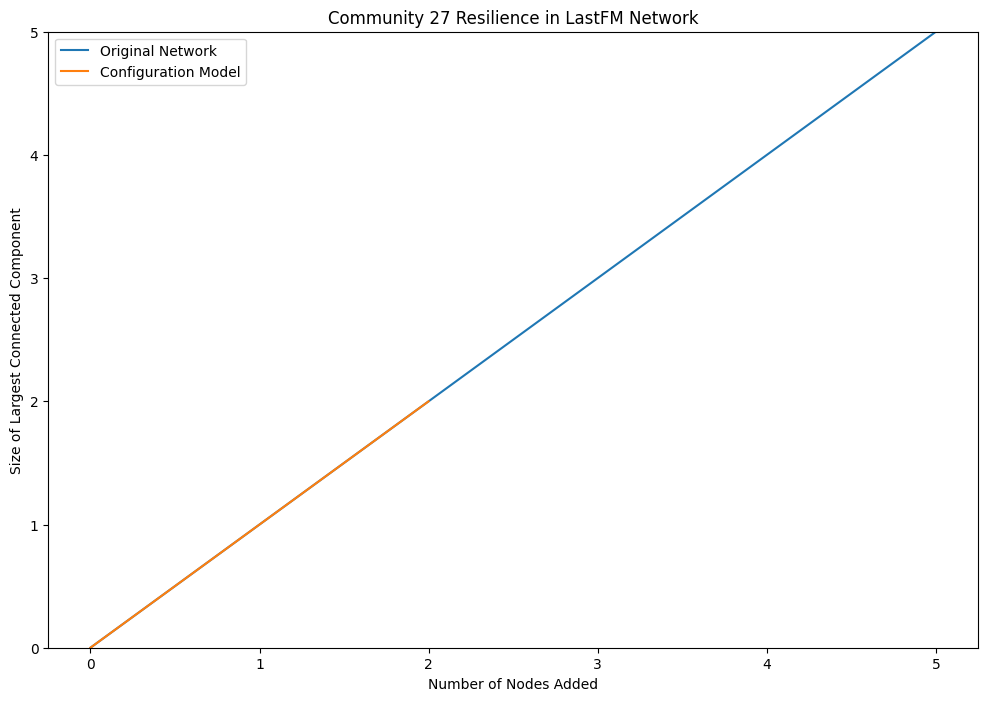

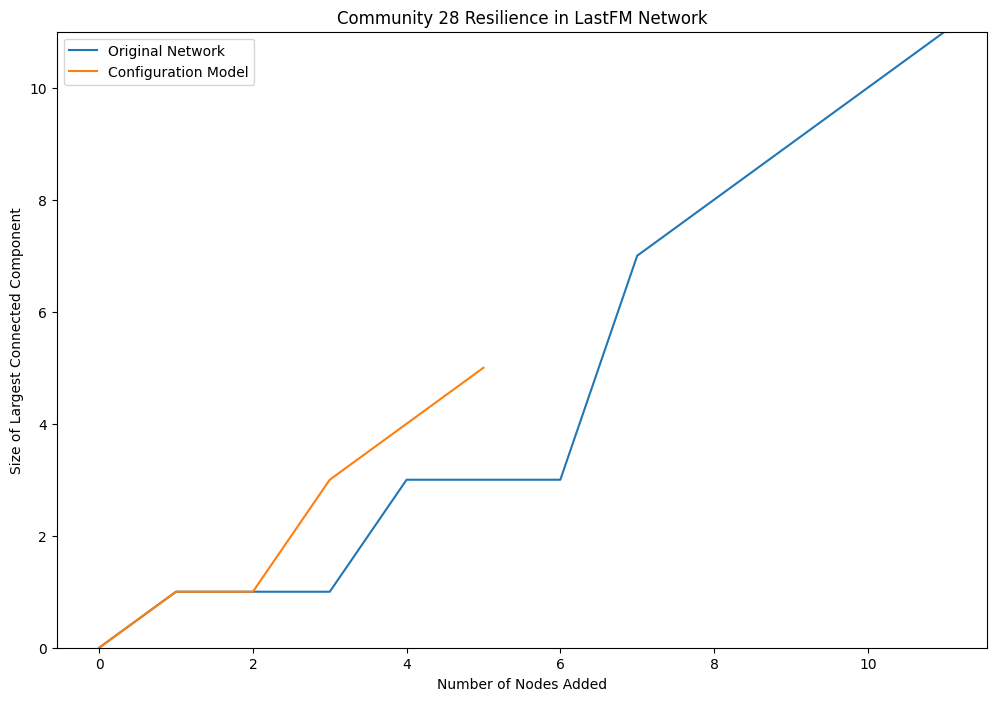

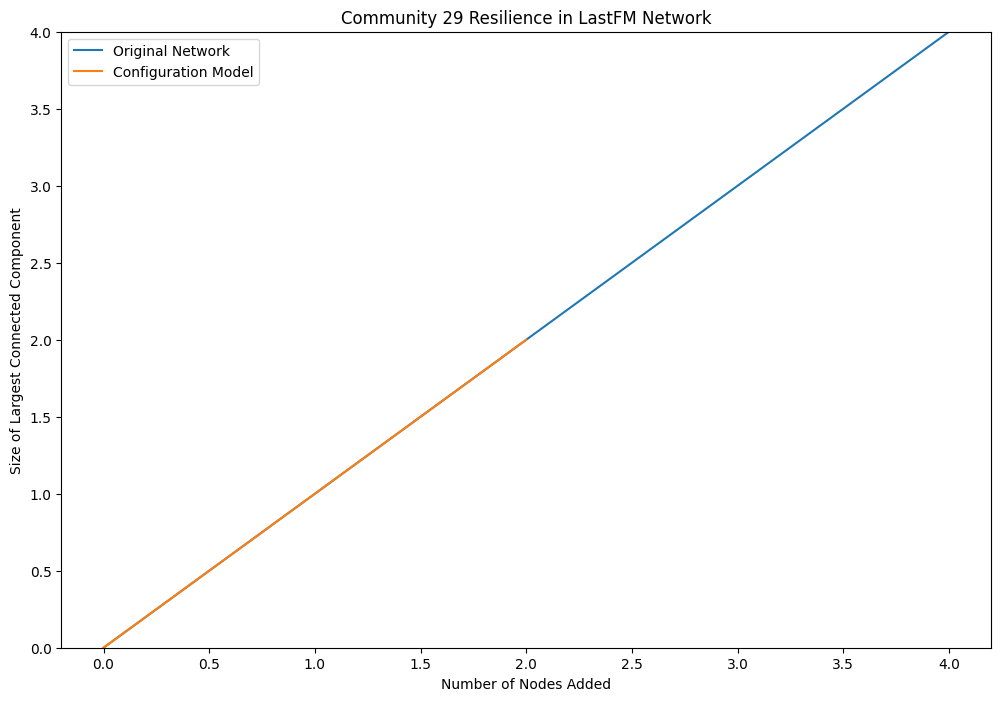

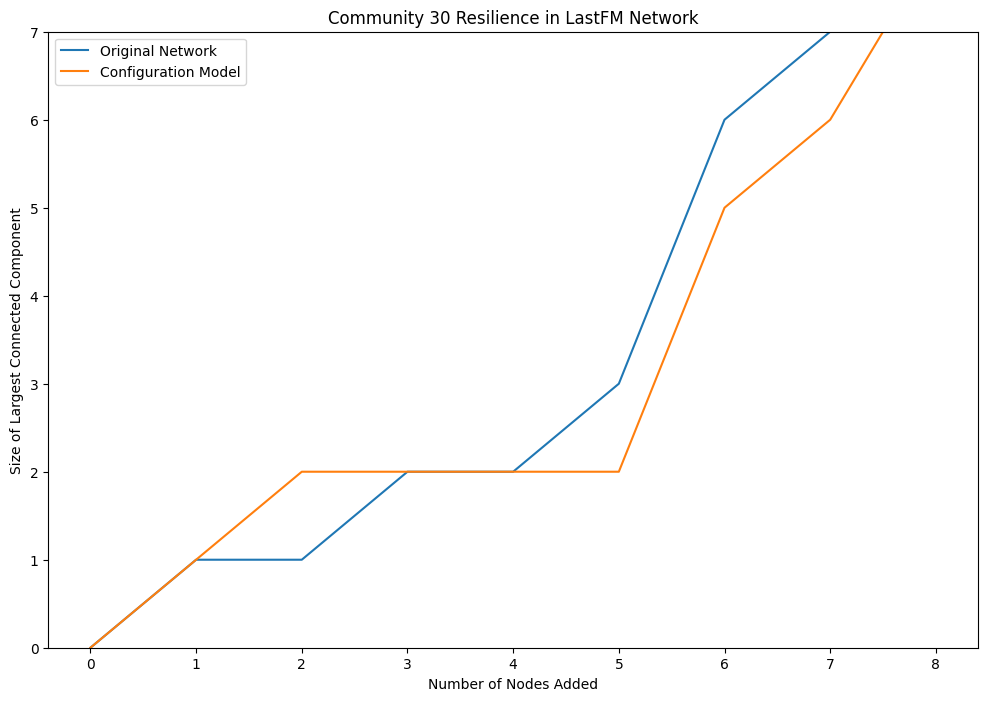

In [9]:
# Plot community resilience
for comm_id in community_resilience_lastfm:
    plt.figure(figsize=(12, 8))
    plt.plot(community_resilience_lastfm[comm_id], label='Original Network')
    if comm_id in community_resilience_configuration_lastfm:
        plt.plot(community_resilience_configuration_lastfm[comm_id], label='Configuration Model')
    if comm_id in community_resilience_ba_lastfm:
        plt.plot(community_resilience_ba_lastfm[comm_id], label='BA Model')
    plt.xlabel('Number of Nodes Added')
    plt.ylabel('Size of Largest Connected Component')
    plt.title(f'Community {comm_id} Resilience in LastFM Network')
    plt.ylim(0, max(community_resilience_lastfm[comm_id]))  # Set y-axis to start from 0
    plt.legend()
    plt.show()


Number of communities detected: 26
LastFM dataset modularity: 0.8145609907992257


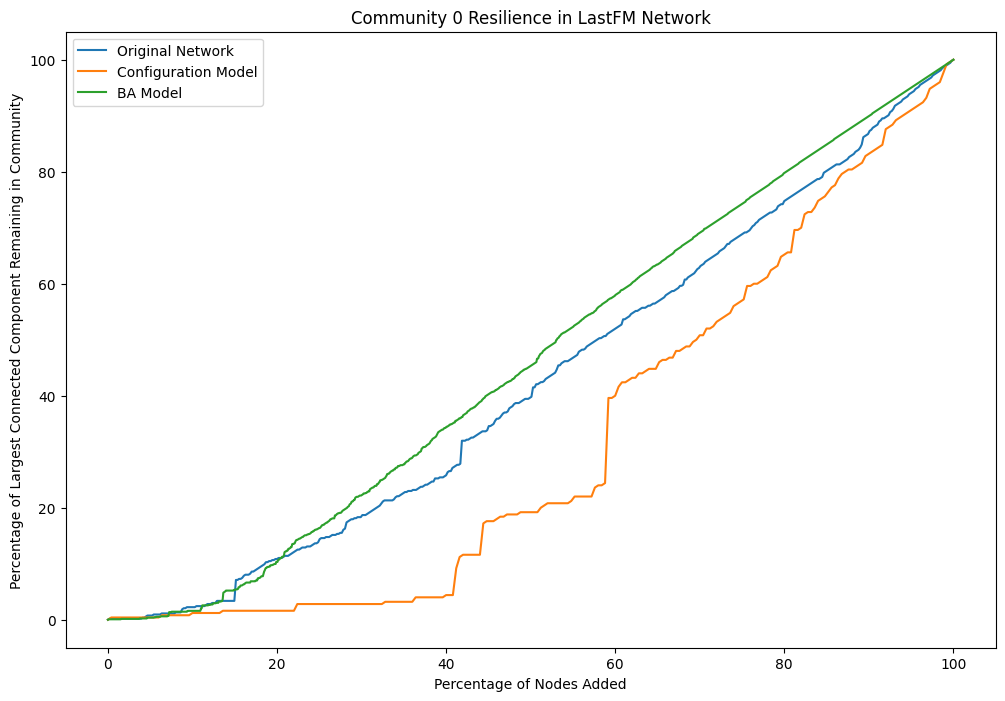

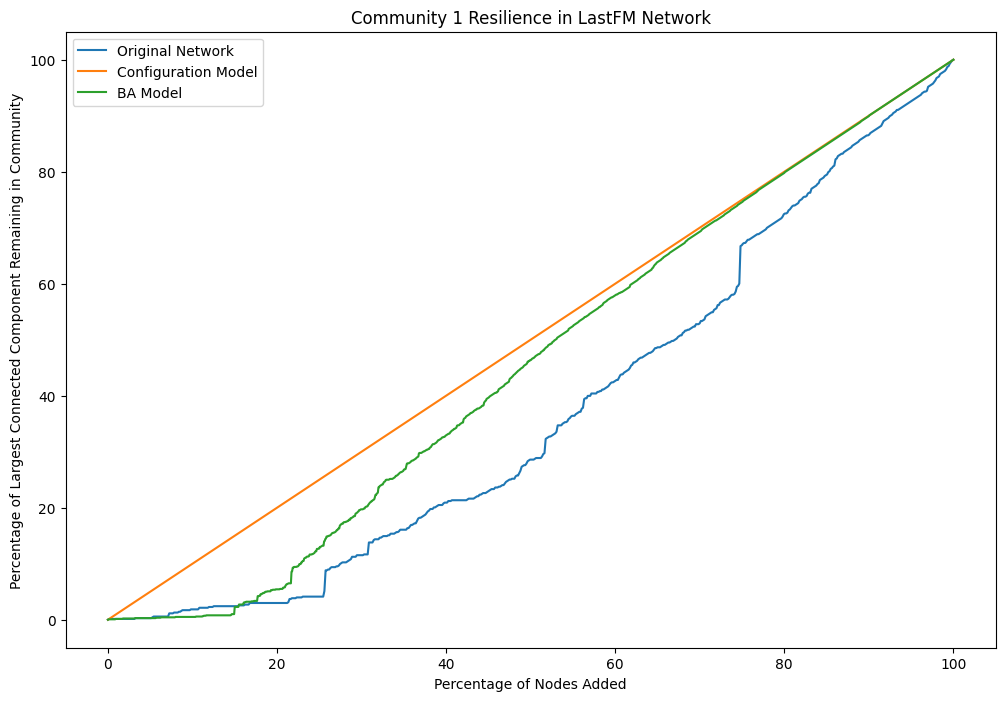

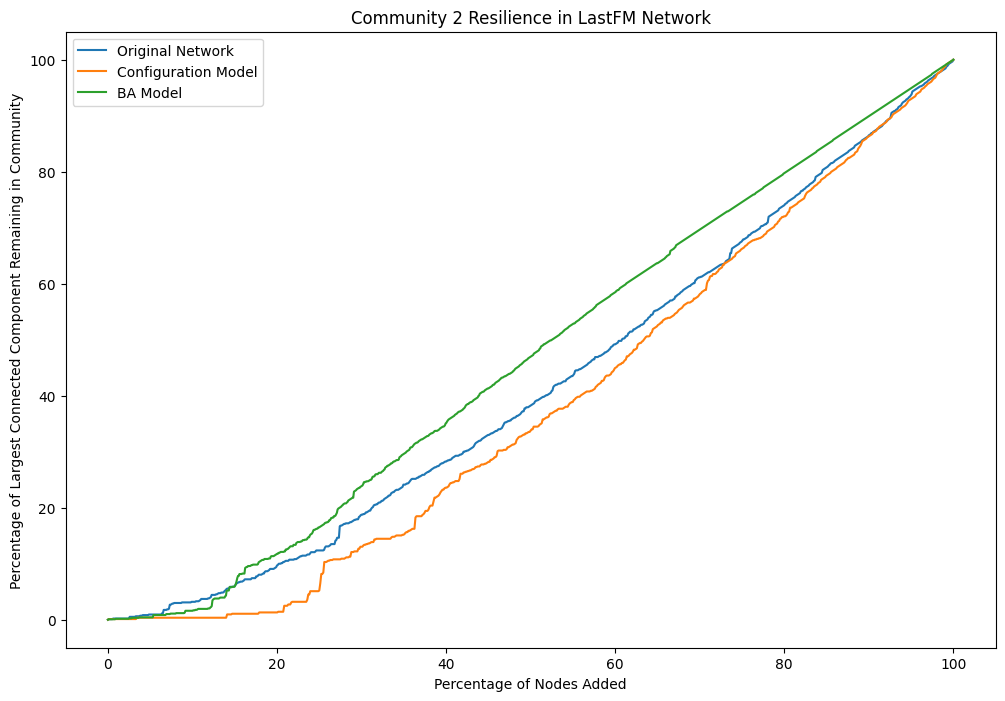

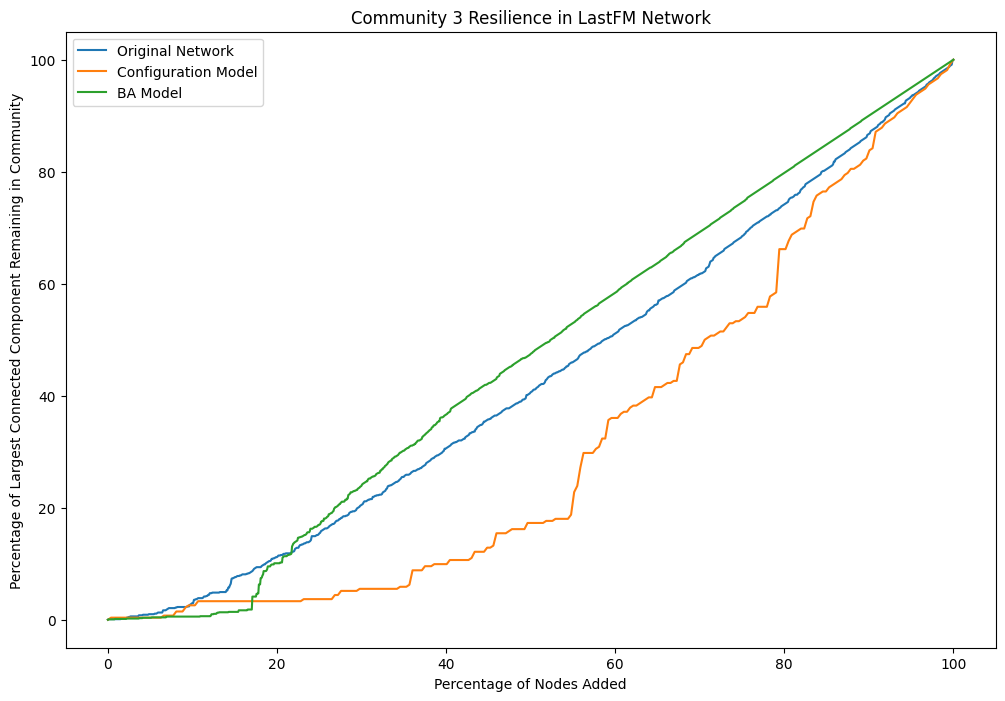

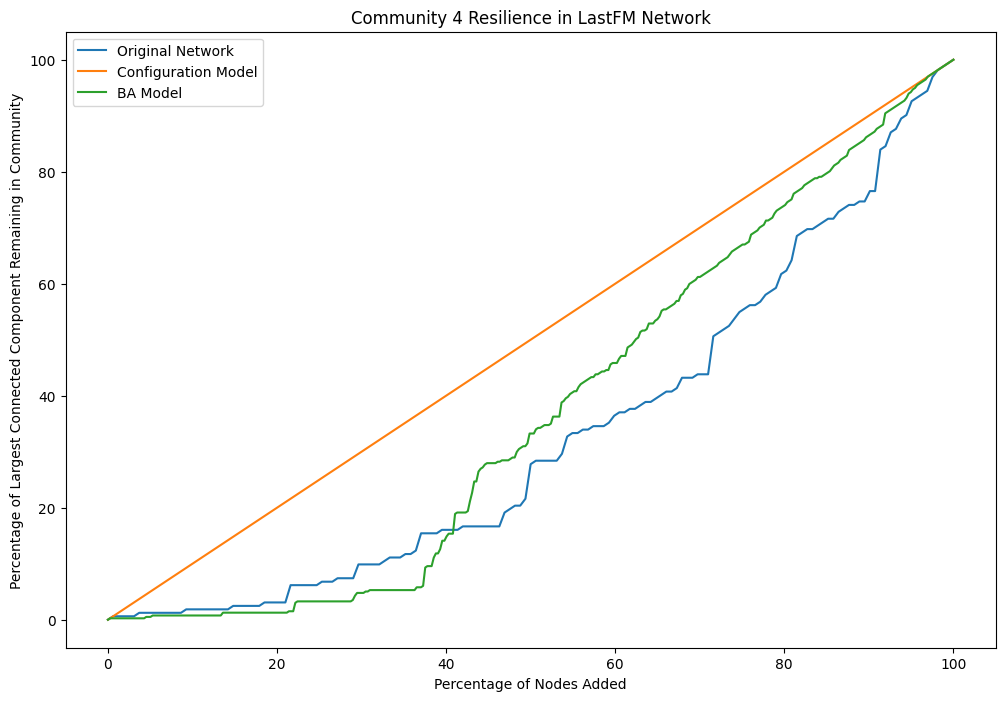

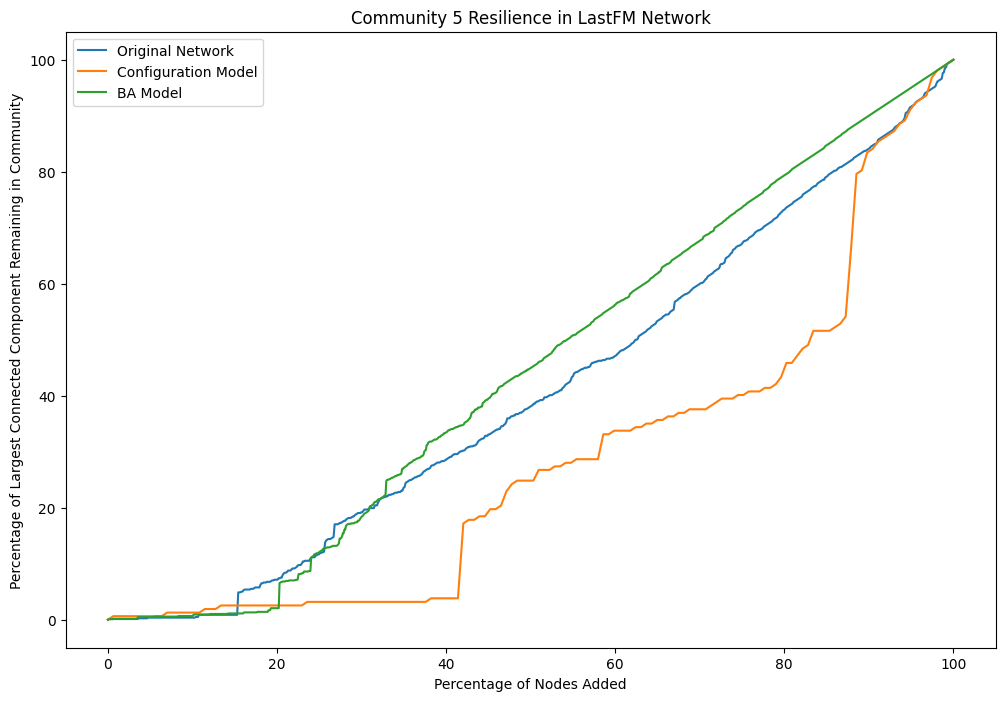

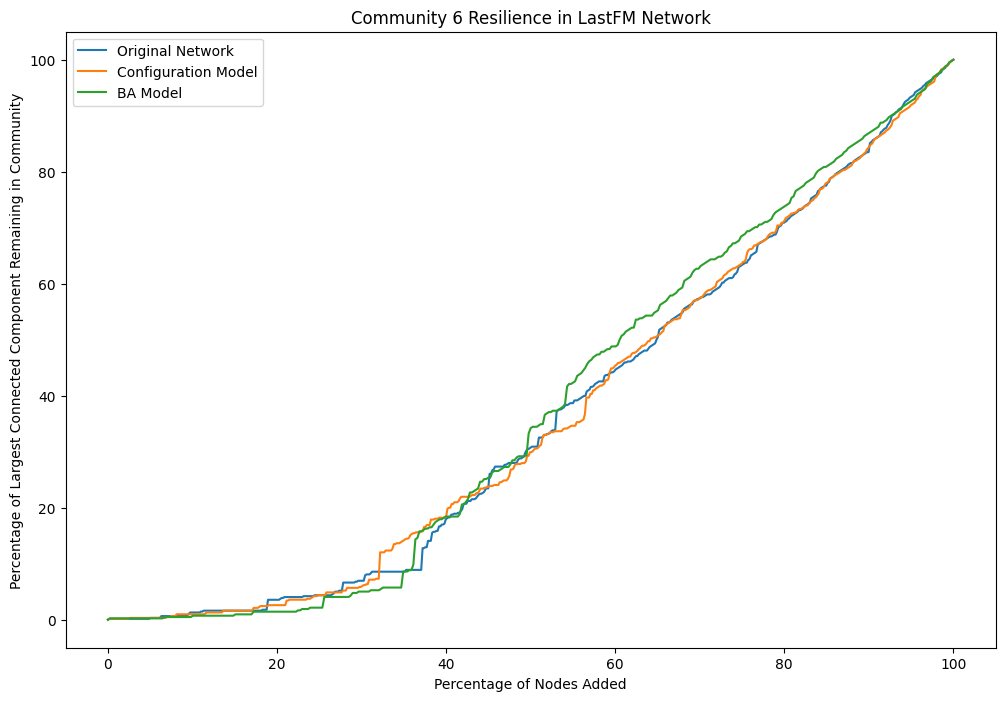

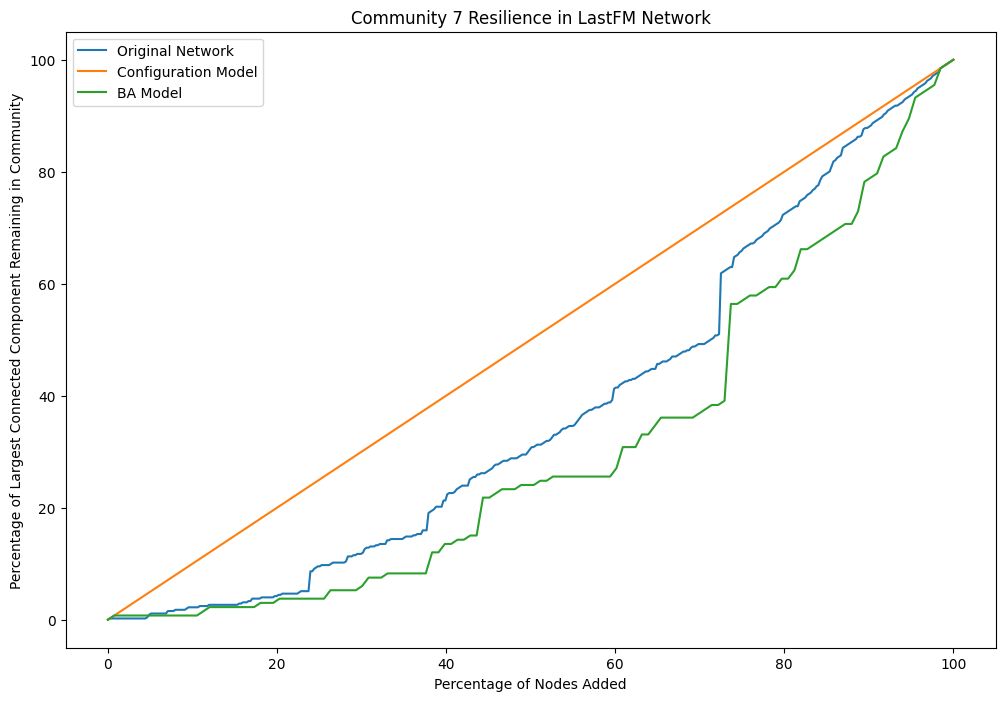

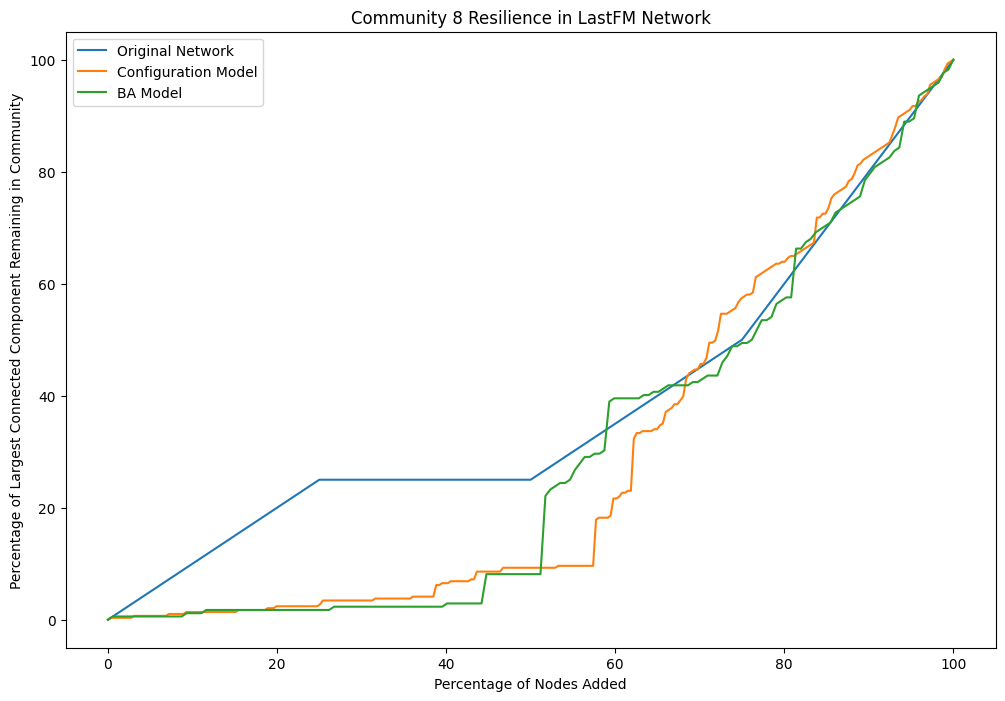

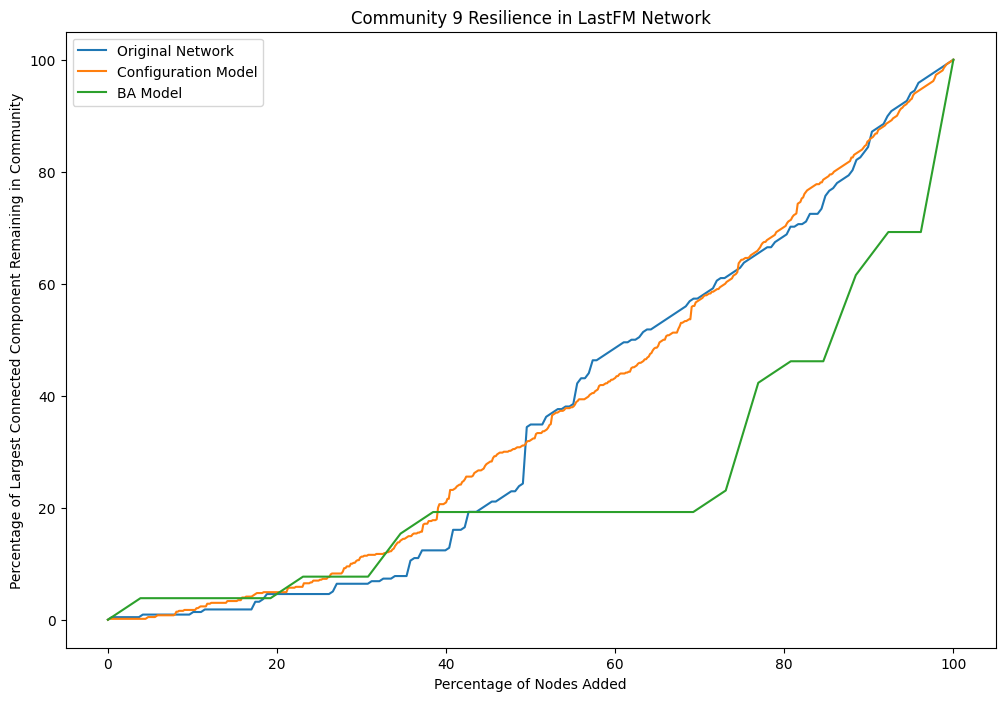

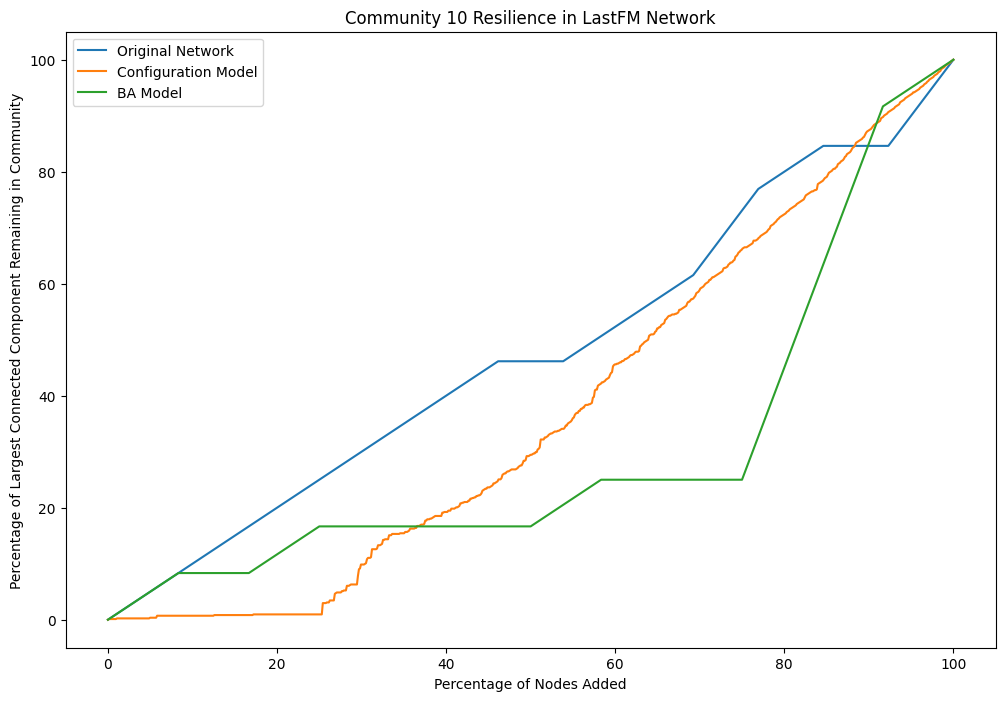

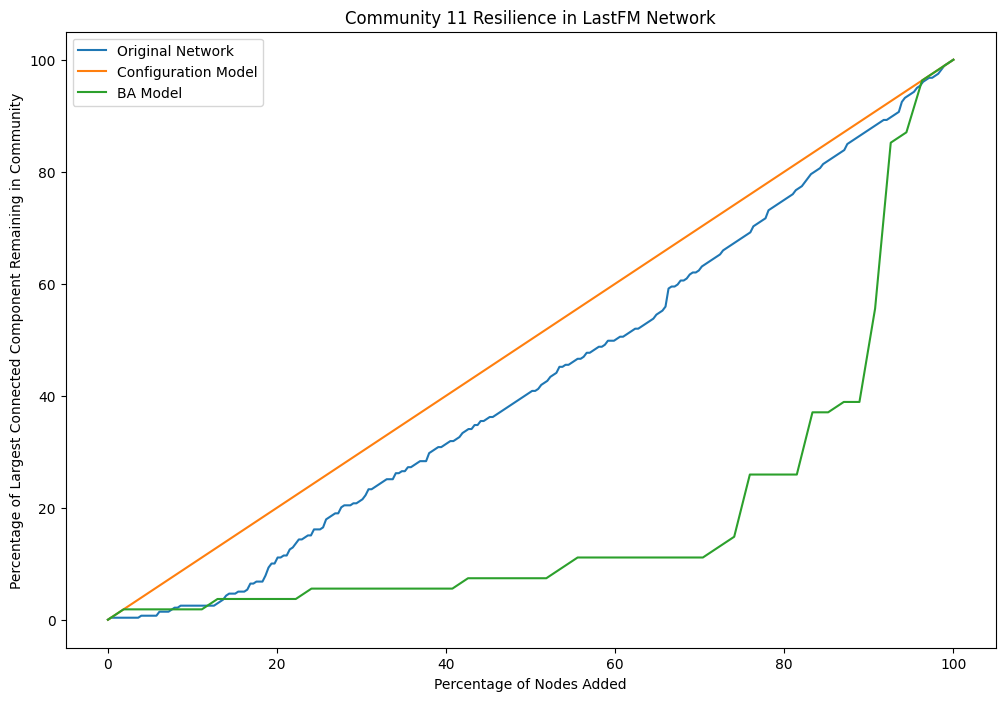

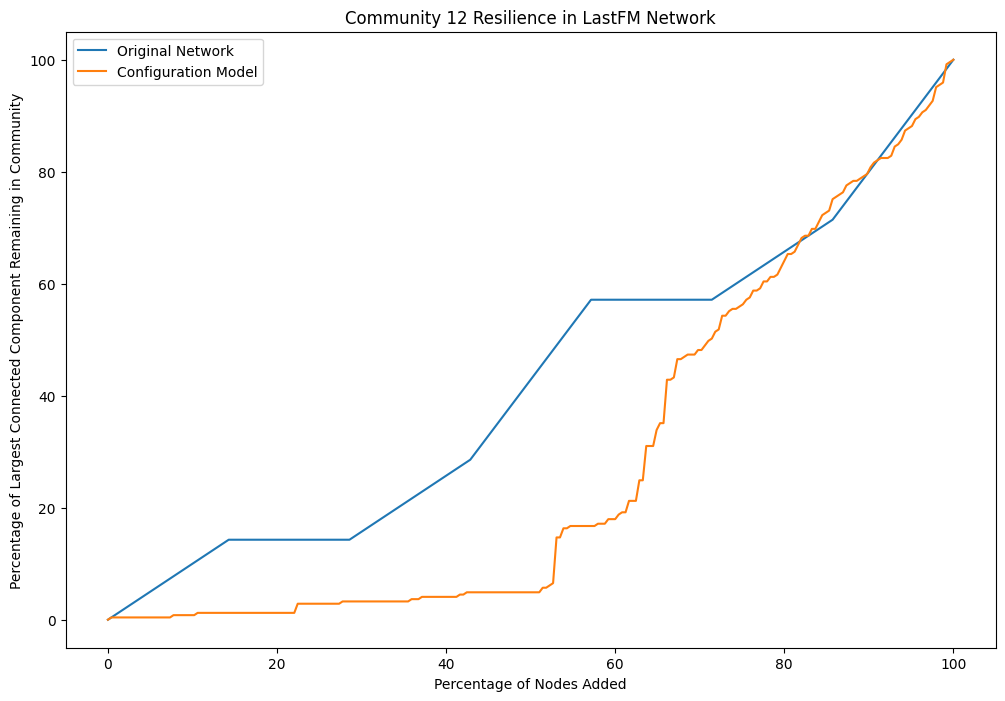

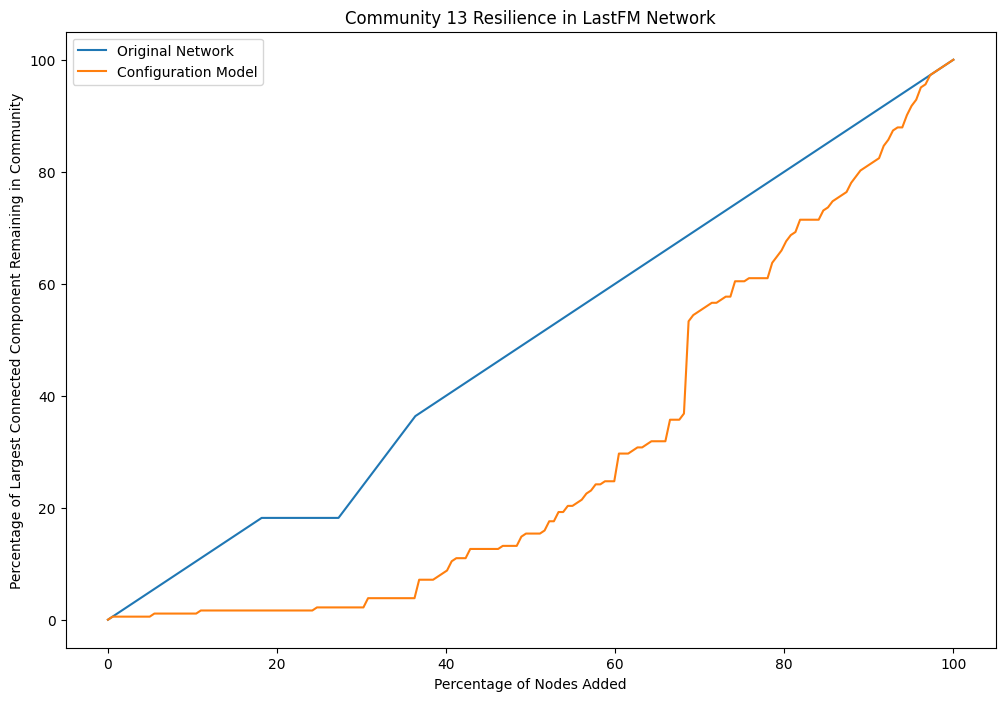

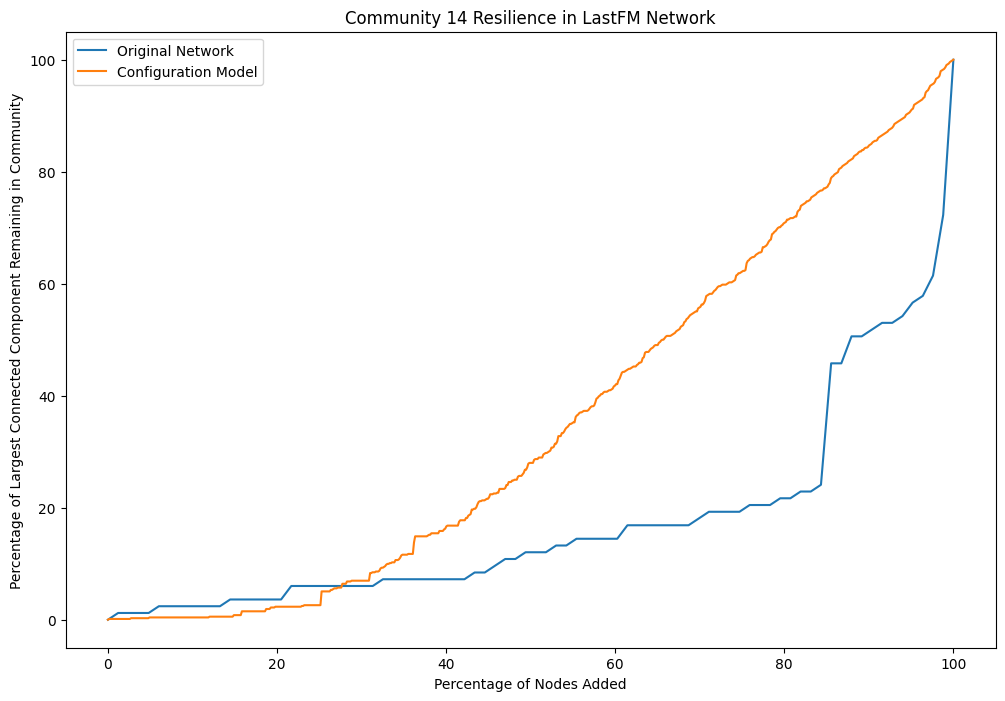

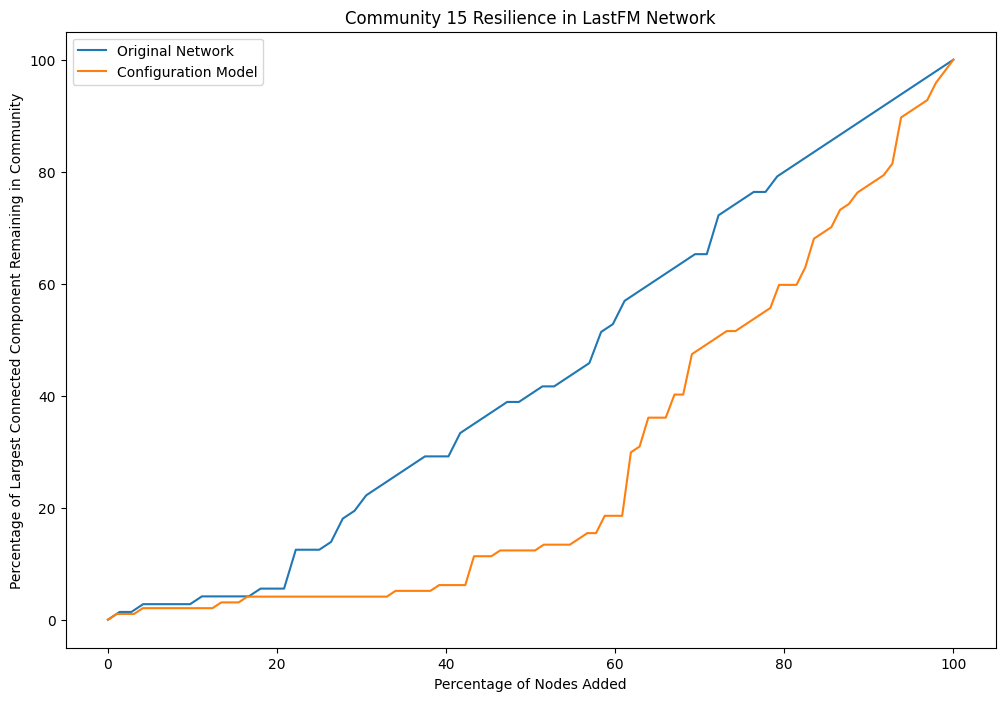

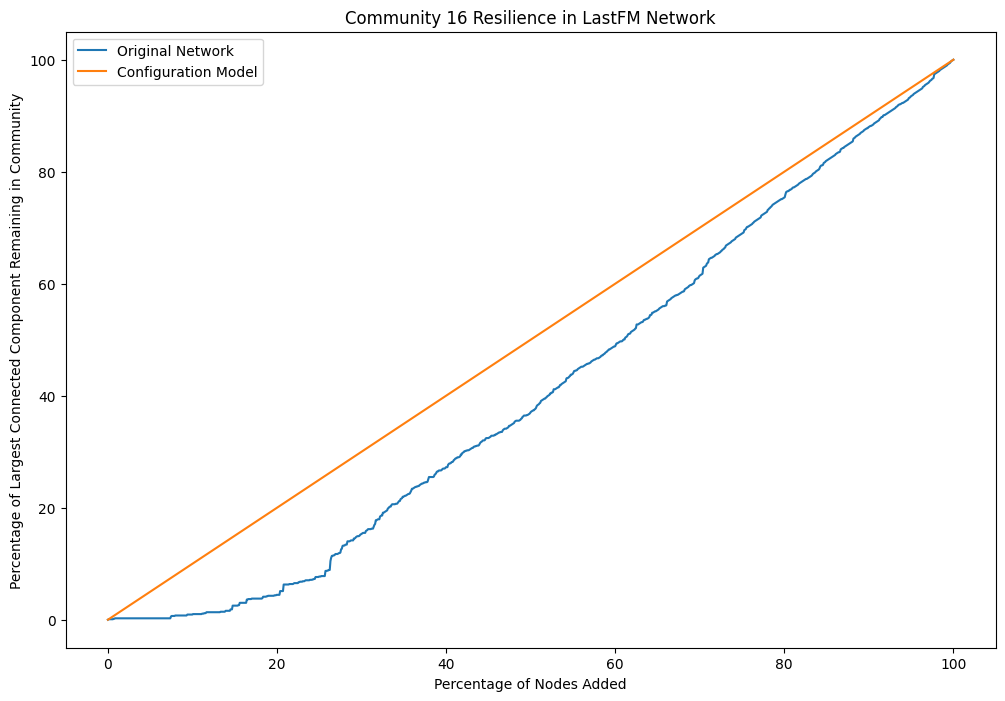

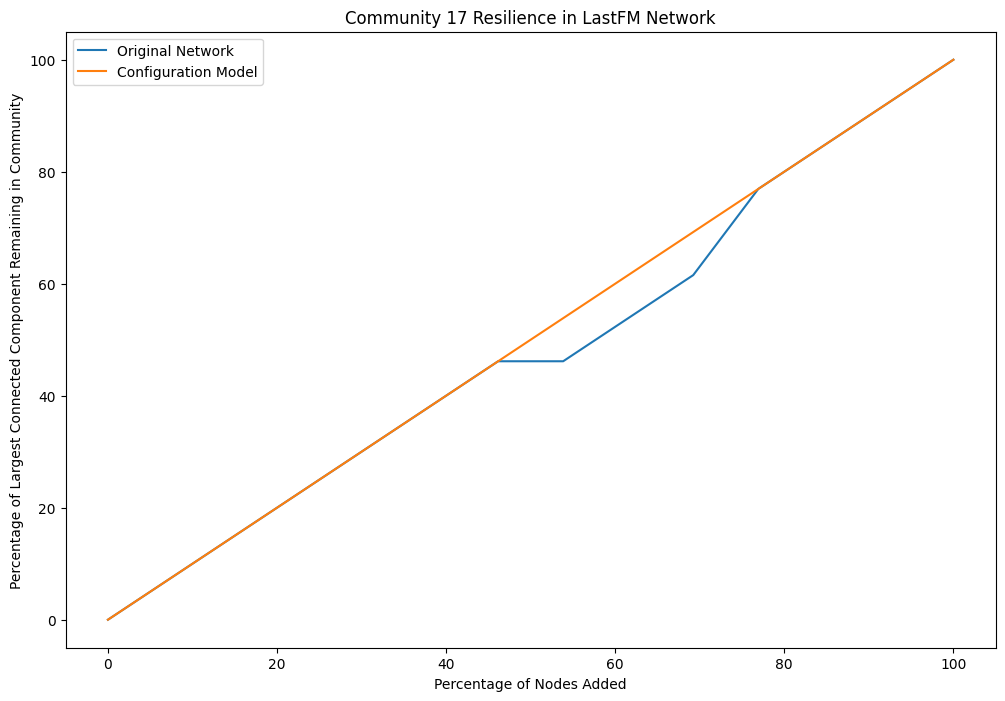

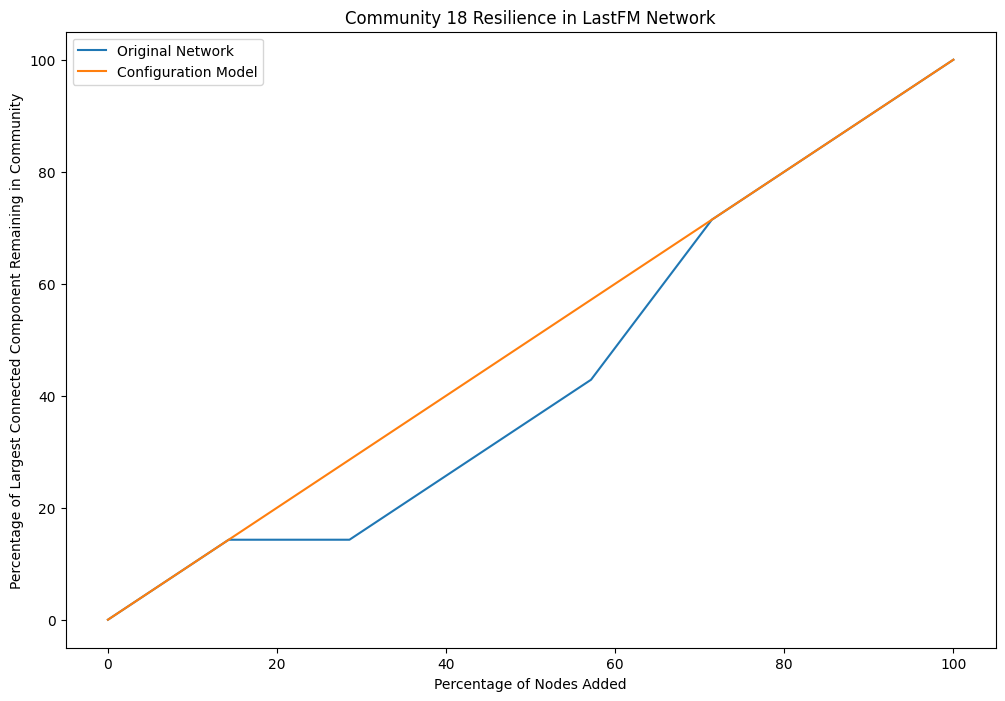

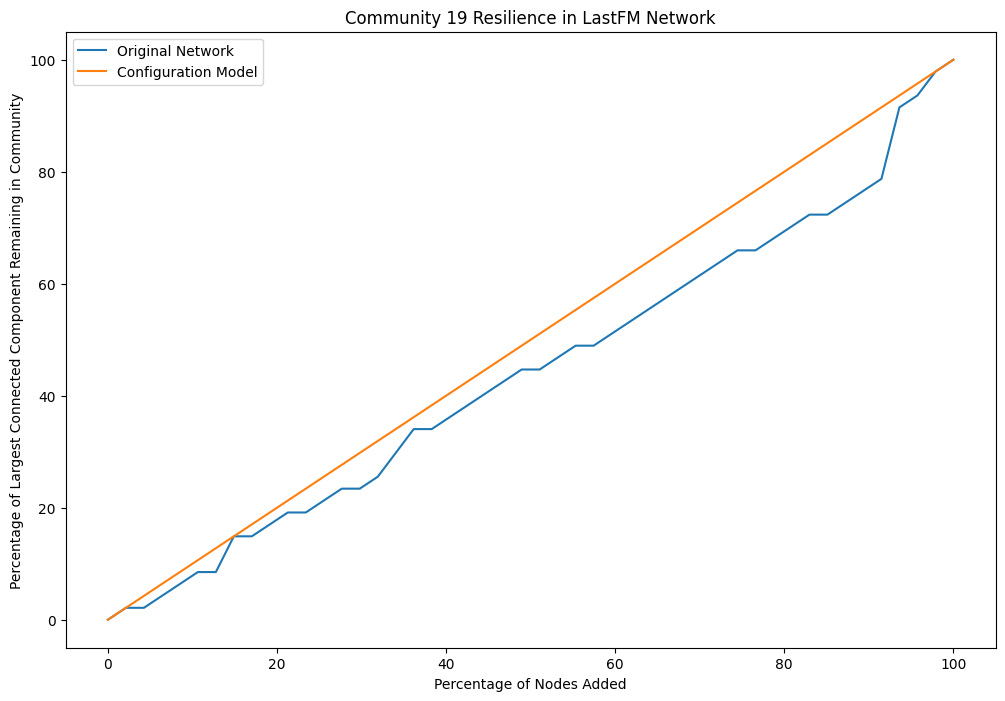

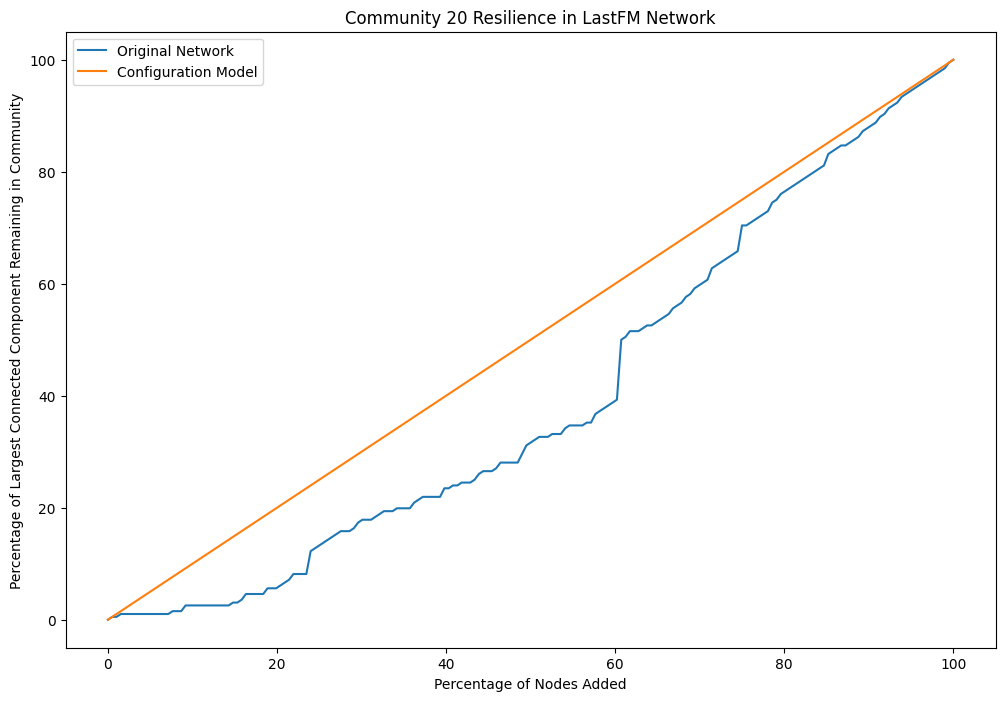

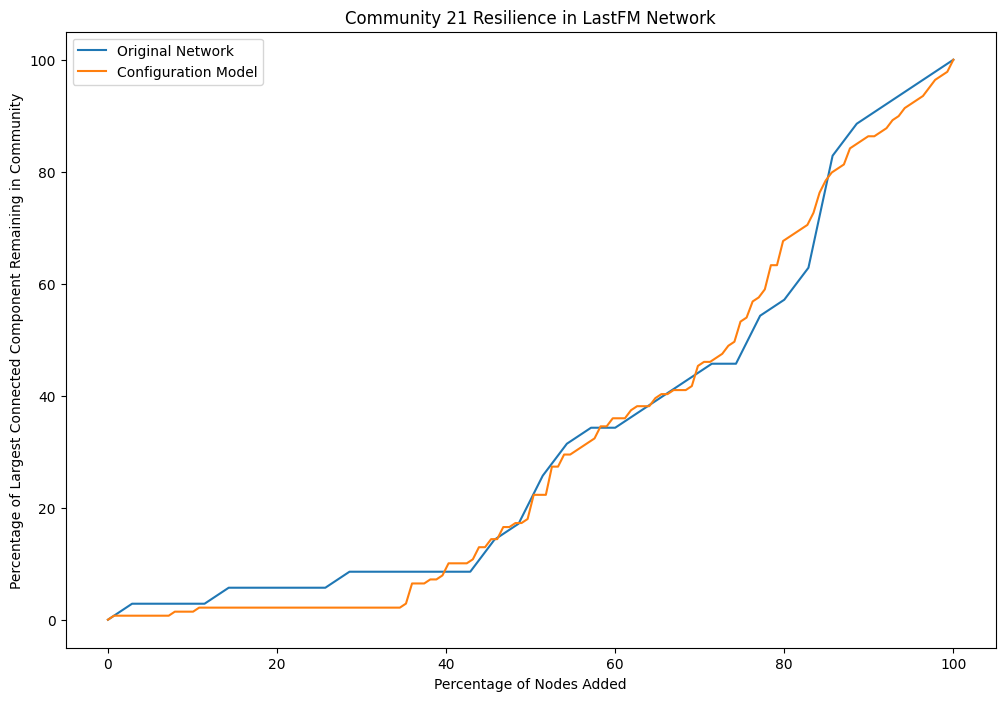

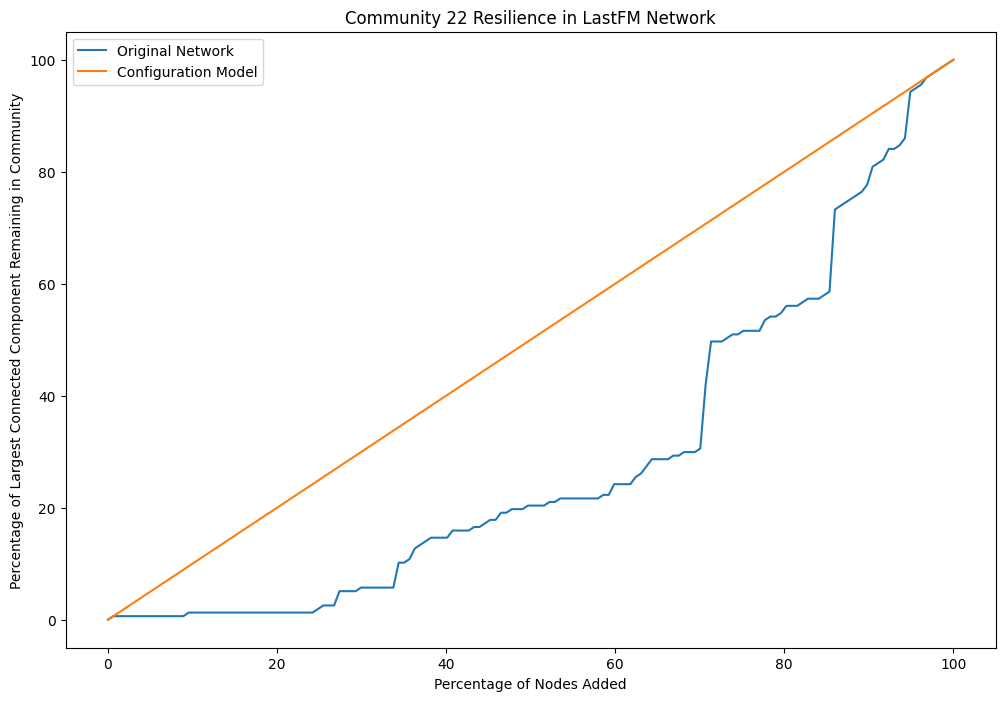

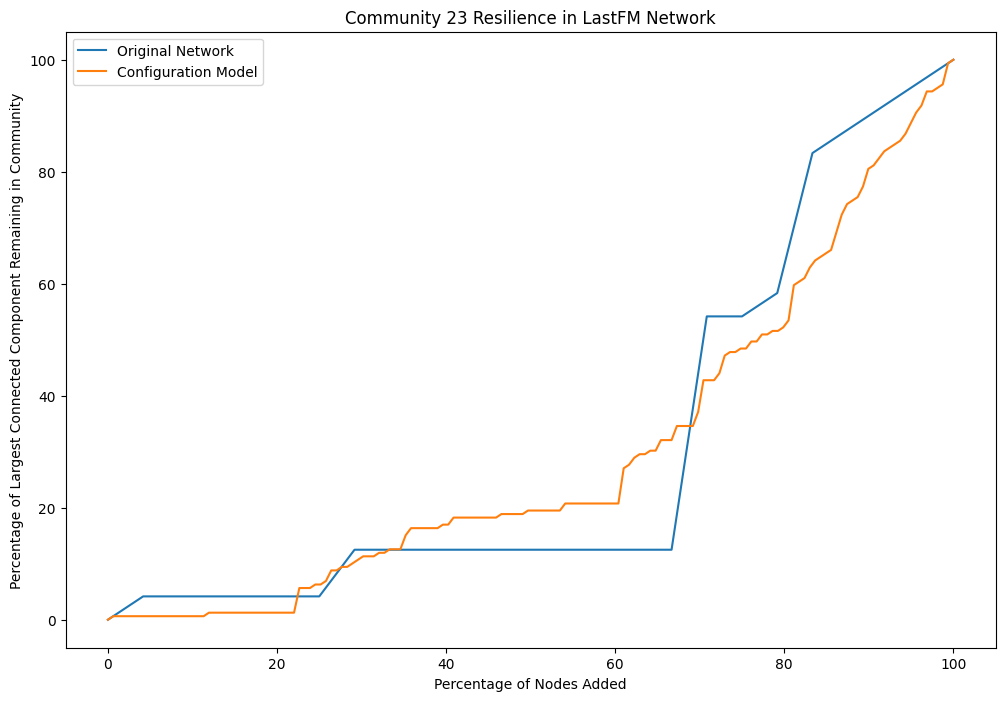

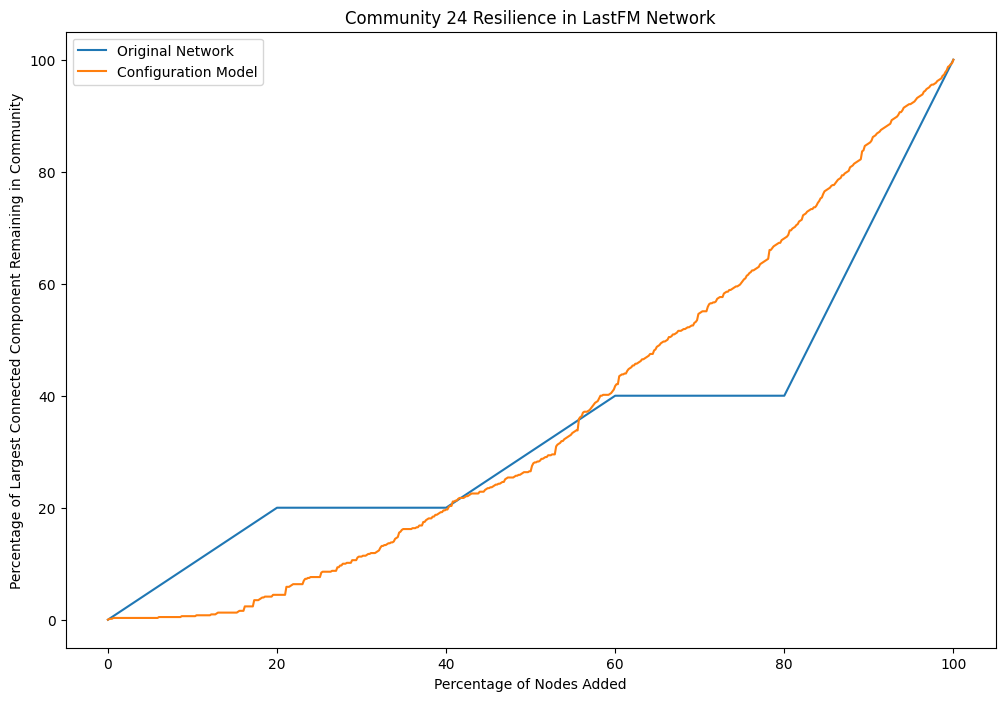

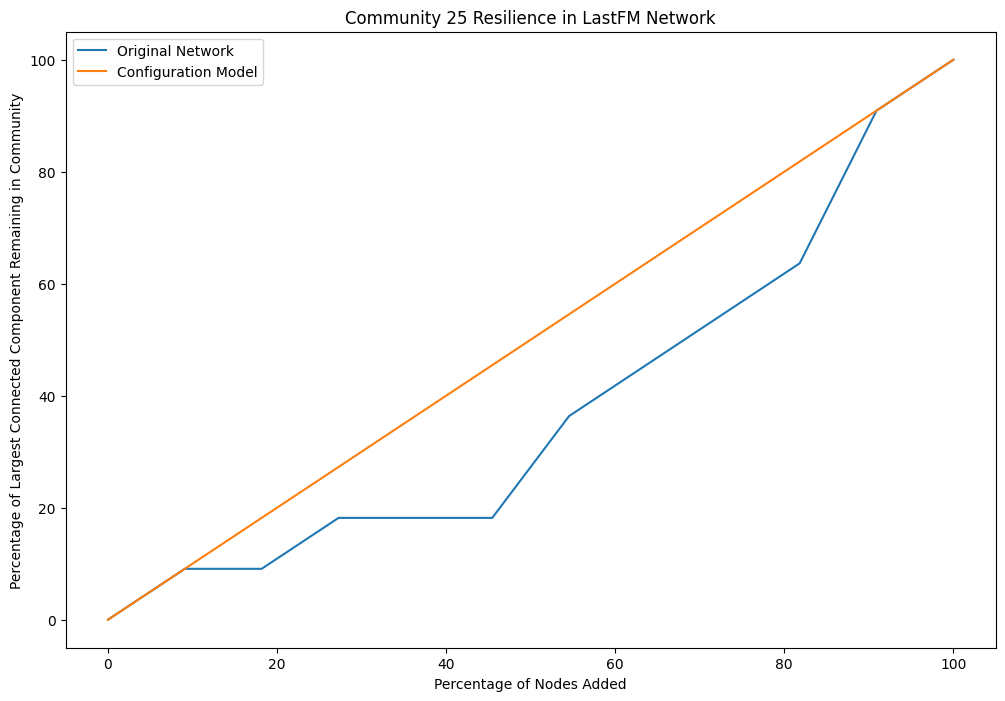

In [1]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import numpy as np

# Define random order function
def random_order(graph):
    nodes = list(graph.nodes())
    np.random.shuffle(nodes)
    return nodes

# Define resilience computation function based on percentage of nodes added
def compute_resilience_percentage(graph, attack_order):
    total_nodes = len(attack_order)
    resilience = [0]  # Initialize with 0 to ensure the plot starts from 0
    added_graph = nx.Graph()

    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            largest_component_size = len(max(remaining_components, key=len))
            resilience.append(largest_component_size / total_nodes * 100)
        else:
            resilience.append(0)
    return resilience

# Define community resilience computation function
def compute_community_resilience_percentage(graph, partition):
    community_resilience = {}
    for comm_id in set(partition.values()):
        subgraph_nodes = [node for node in partition if partition[node] == comm_id]
        subgraph = graph.subgraph(subgraph_nodes).copy()
        attack_order = random_order(subgraph)
        resilience = compute_resilience_percentage(subgraph, attack_order)
        community_resilience[comm_id] = resilience
    return community_resilience

# Load the preprocessed LastFM graph
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')

# Detect communities using the Louvain method
partition_lastfm = community_louvain.best_partition(lastfm_graph)
print(f"Number of communities detected: {len(set(partition_lastfm.values()))}")

# Calculate modularity
modularity_lastfm = community_louvain.modularity(partition_lastfm, lastfm_graph)
print(f"LastFM dataset modularity: {modularity_lastfm}")

# Generate synthetic models
degree_sequence = [d for n, d in lastfm_graph.degree()]
configuration_model_lastfm = nx.configuration_model(degree_sequence)
ba_model_lastfm = nx.barabasi_albert_graph(lastfm_graph.number_of_nodes(), int(sum(degree_sequence) / lastfm_graph.number_of_nodes()))

# Convert configuration model to a simple graph
configuration_model_lastfm = nx.Graph(configuration_model_lastfm)

# Detect communities in synthetic models
partition_configuration_model_lastfm = community_louvain.best_partition(configuration_model_lastfm)
partition_ba_lastfm = community_louvain.best_partition(ba_model_lastfm)

# Calculate community resilience for each model
community_resilience_lastfm = compute_community_resilience_percentage(lastfm_graph, partition_lastfm)
community_resilience_configuration_lastfm = compute_community_resilience_percentage(configuration_model_lastfm, partition_configuration_model_lastfm)
community_resilience_ba_lastfm = compute_community_resilience_percentage(ba_model_lastfm, partition_ba_lastfm)

# Plot community resilience for all communities across models
for comm_id in sorted(community_resilience_lastfm.keys()):
    plt.figure(figsize=(12, 8))
    
    # Get the appropriate x_values length
    x_values_lastfm = np.linspace(0, 100, len(community_resilience_lastfm[comm_id]))  
    plt.plot(x_values_lastfm, community_resilience_lastfm[comm_id], label='Original Network')
    
    if comm_id in community_resilience_configuration_lastfm:
        x_values_conf = np.linspace(0, 100, len(community_resilience_configuration_lastfm[comm_id]))
        plt.plot(x_values_conf, community_resilience_configuration_lastfm[comm_id], label='Configuration Model')
    
    if comm_id in community_resilience_ba_lastfm:
        x_values_ba = np.linspace(0, 100, len(community_resilience_ba_lastfm[comm_id]))
        plt.plot(x_values_ba, community_resilience_ba_lastfm[comm_id], label='BA Model')
    
    plt.xlabel('Percentage of Nodes Added')
    plt.ylabel('Percentage of Largest Connected Component Remaining in Community')
    plt.title(f'Community {comm_id} Resilience in LastFM Network')
    plt.legend()
    plt.show()


Number of communities detected: 29
LastFM dataset modularity: 0.8144393020922924


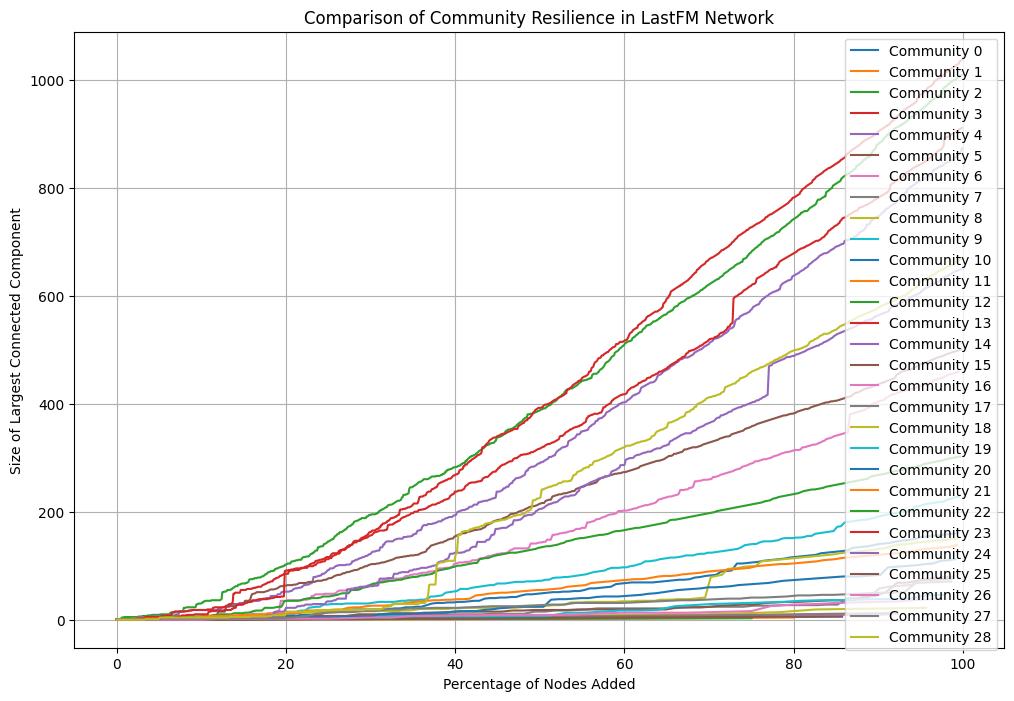

In [3]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import random

# Define random order function
def random_order(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

# Define resilience computation function
def compute_resilience_adding_nodes(graph, attack_order):
    initial_nodes = graph.number_of_nodes()
    resilience = []
    added_graph = nx.Graph()
    
    for node in attack_order:
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
    return resilience

# Define community resilience computation function
def compute_community_resilience(graph, partition):
    community_resilience = {}
    for comm_id in set(partition.values()):
        subgraph_nodes = [node for node in partition if partition[node] == comm_id]
        subgraph = graph.subgraph(subgraph_nodes).copy()
        attack_order = random_order(subgraph)
        resilience = compute_resilience_adding_nodes(subgraph, attack_order)
        community_resilience[comm_id] = resilience
    return community_resilience

# Load the preprocessed LastFM graph
lastfm_graph = nx.read_gml('data/lastfm_graph.gml')

# Detect communities using the Louvain method
partition_lastfm = community_louvain.best_partition(lastfm_graph)
print(f"Number of communities detected: {len(set(partition_lastfm.values()))}")

# Calculate modularity
modularity_lastfm = community_louvain.modularity(partition_lastfm, lastfm_graph)
print(f"LastFM dataset modularity: {modularity_lastfm}")

# Compute community resilience for the original network
community_resilience_lastfm = compute_community_resilience(lastfm_graph, partition_lastfm)

# Plot all community resilience curves on the same figure
plt.figure(figsize=(12, 8))

for comm_id, resilience in community_resilience_lastfm.items():
    # Normalize x-axis as percentage of nodes added
    x_axis_normalized = [(i / len(resilience)) * 100 for i in range(len(resilience))]
    plt.plot(x_axis_normalized, resilience, label=f'Community {comm_id}')

plt.xlabel('Percentage of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Community Resilience in LastFM Network')
plt.legend()
plt.grid(True)
plt.show()
